## PROJECT NAME : HOUSE PRICES : ADVANCED REGRESSION TECHNIQUE
This project aims to predict house prices based on various features

### Data scientist lifecycle
1. Data anlysis
2. Feature enginering
3. Feature selection
4. Model Building

In [3]:
## data analysis phase
## to understand more about the data

# loading all the libraries required
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## display all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)



In [4]:
dataset = pd.read_csv("..\data\AmesHousing.csv")

row, columm= dataset.shape

print('dataset has {} rows and {} columns'.format(row, columm))

dataset has 2930 rows and 82 columns


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_6160\3285417274.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset = pd.read_csv("..\data\AmesHousing.csv")


what we will do exploration data analysisj
1. missing values
2. all the numerical variables
3. distribution of the numerical variables
4. categorical variables
5. cardinality of the categorical variables 
6. outliers
7. Correlation analysis between numerical features
8. Relationship between independent and dependent features(SalePrice)

In [4]:
# checking missing values in the dataset

missing_value_percent = dataset.isnull().mean().sort_values(ascending = False) * 100

for column, percent in missing_value_percent.items() :
  if percent > 0:
    percent_round = np.round(percent, 3)
    print(f'{column} has {percent_round} % missing values')

Pool QC has 99.556 % missing values
Misc Feature has 96.382 % missing values
Alley has 93.242 % missing values
Fence has 80.478 % missing values
Mas Vnr Type has 60.58 % missing values
Fireplace Qu has 48.532 % missing values
Lot Frontage has 16.724 % missing values
Garage Qual has 5.427 % missing values
Garage Yr Blt has 5.427 % missing values
Garage Cond has 5.427 % missing values
Garage Finish has 5.427 % missing values
Garage Type has 5.358 % missing values
Bsmt Exposure has 2.833 % missing values
BsmtFin Type 2 has 2.765 % missing values
Bsmt Qual has 2.73 % missing values
Bsmt Cond has 2.73 % missing values
BsmtFin Type 1 has 2.73 % missing values
Mas Vnr Area has 0.785 % missing values
Bsmt Full Bath has 0.068 % missing values
Bsmt Half Bath has 0.068 % missing values
Total Bsmt SF has 0.034 % missing values
BsmtFin SF 1 has 0.034 % missing values
BsmtFin SF 2 has 0.034 % missing values
Garage Area has 0.034 % missing values
Garage Cars has 0.034 % missing values
Bsmt Unf SF has

Text(0.5, 0, 'percentage')

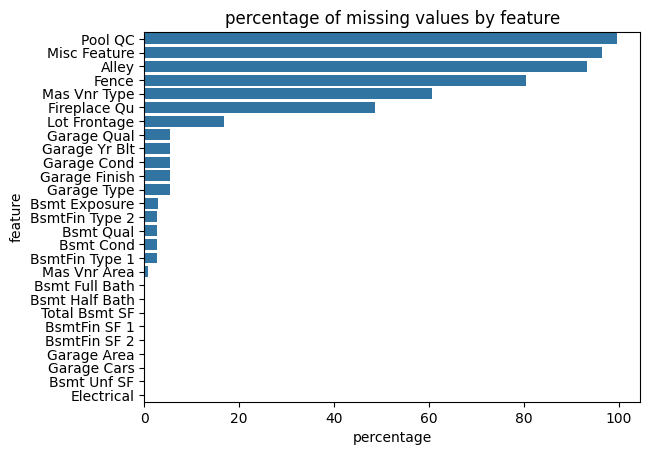

In [5]:
#visualize missing values

missing_value_percent = missing_value_percent[missing_value_percent > 0]
plt.Figure(figsize= (10,12))
sns.barplot(x = missing_value_percent.values, y = missing_value_percent.index)
plt.title('percentage of missing values by feature')
plt.ylabel('feature')
plt.xlabel('percentage')

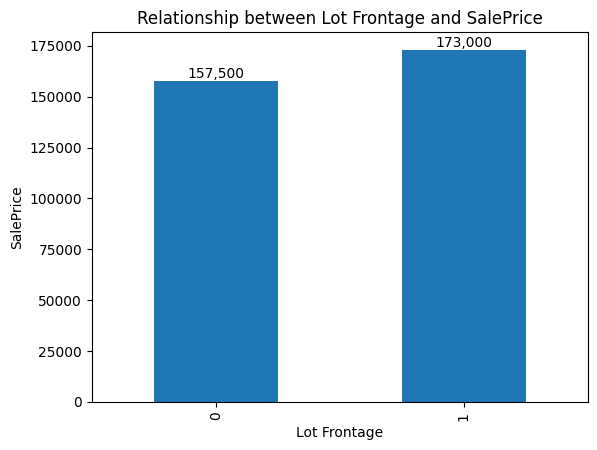

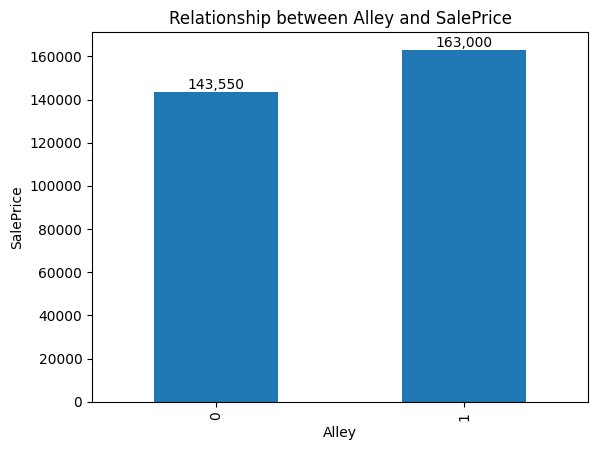

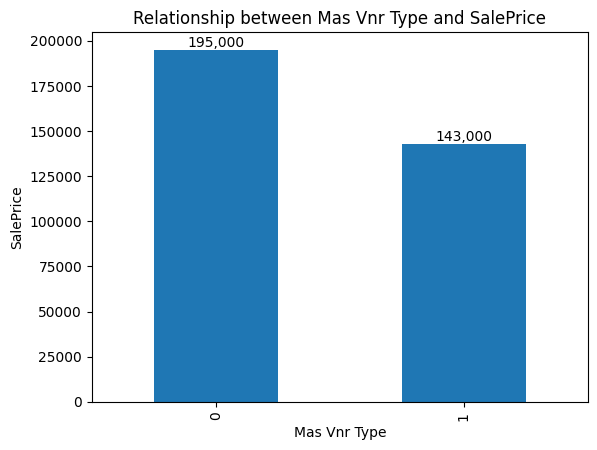

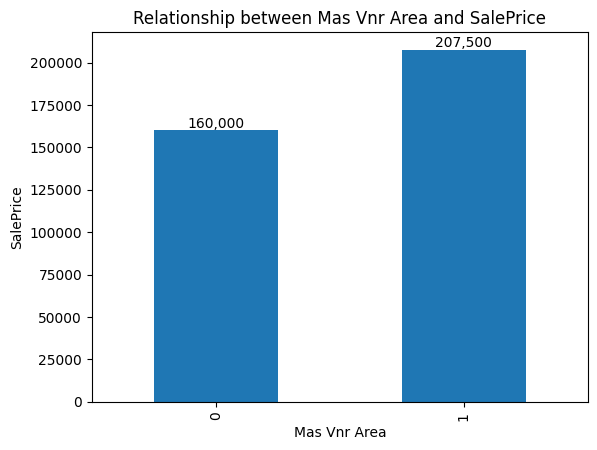

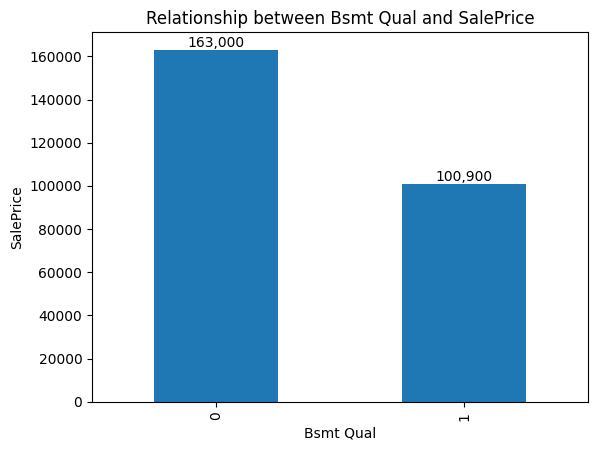

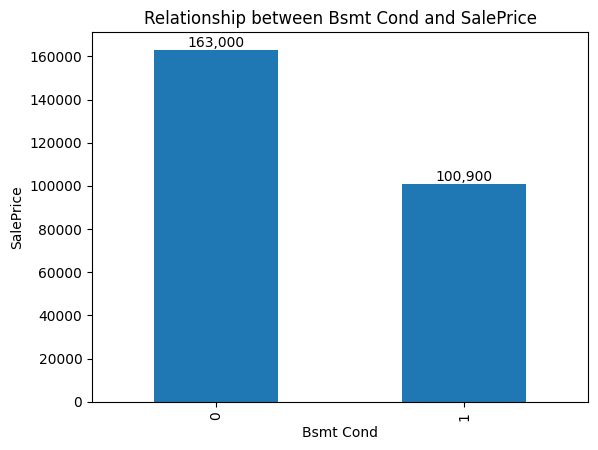

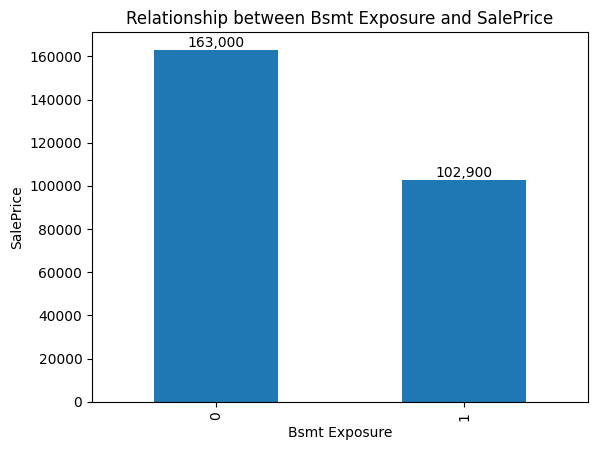

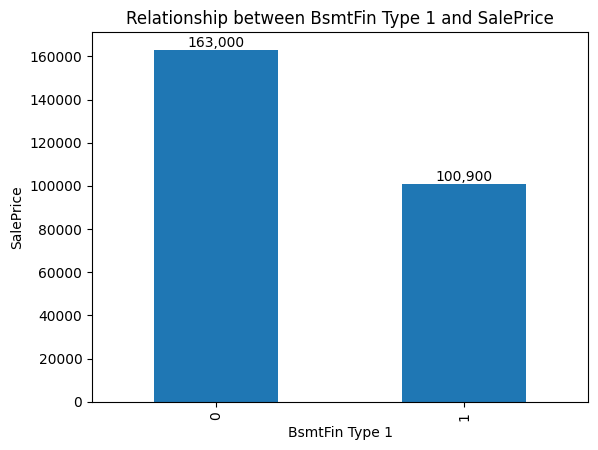

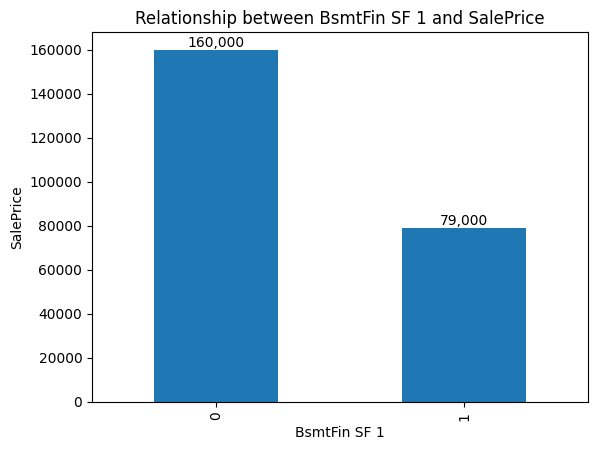

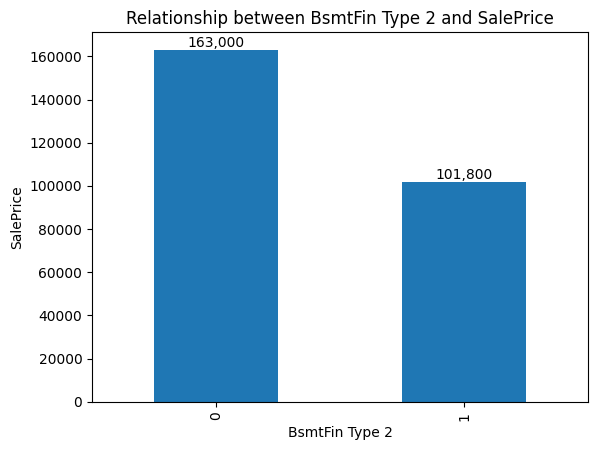

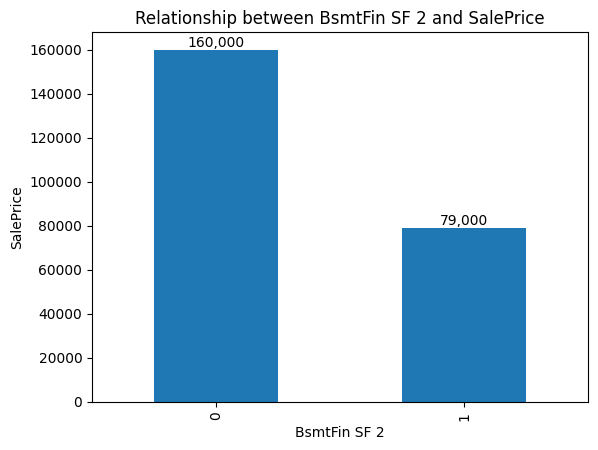

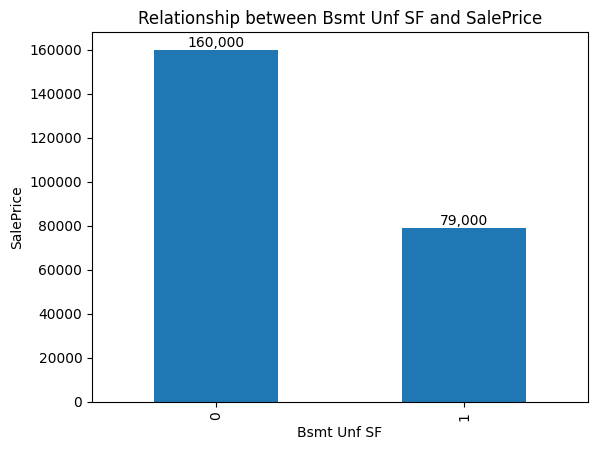

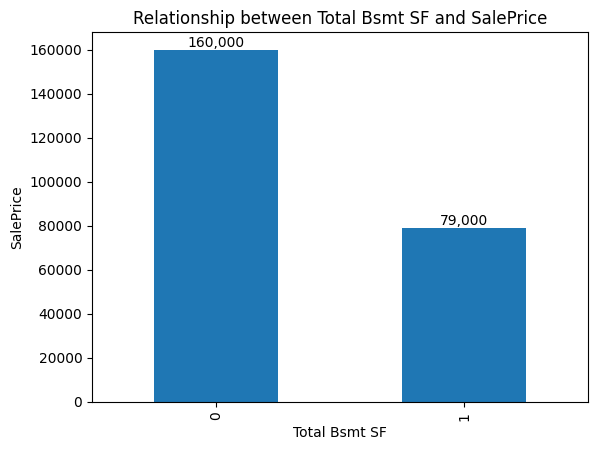

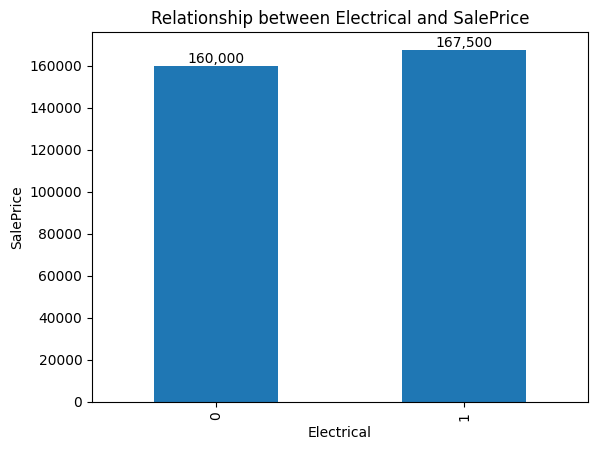

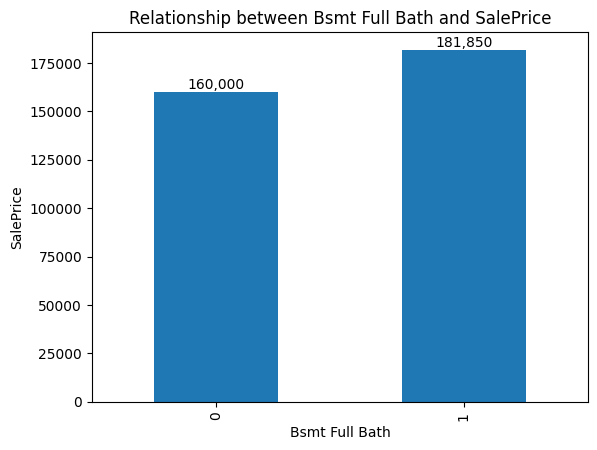

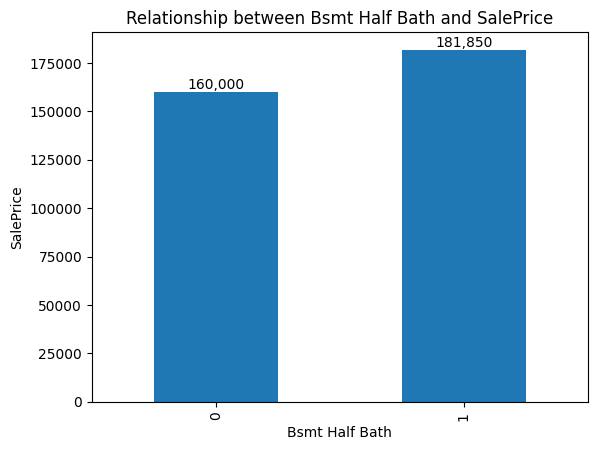

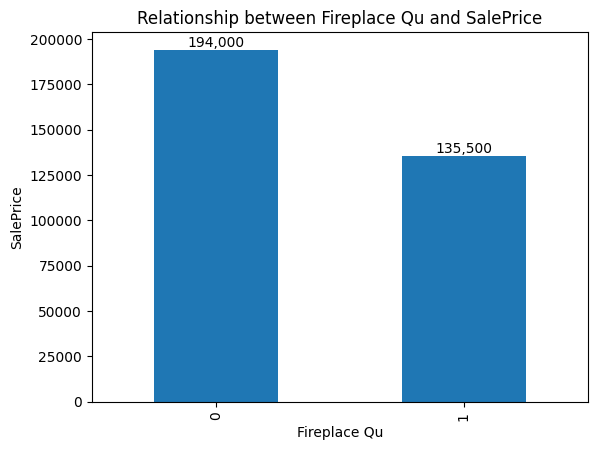

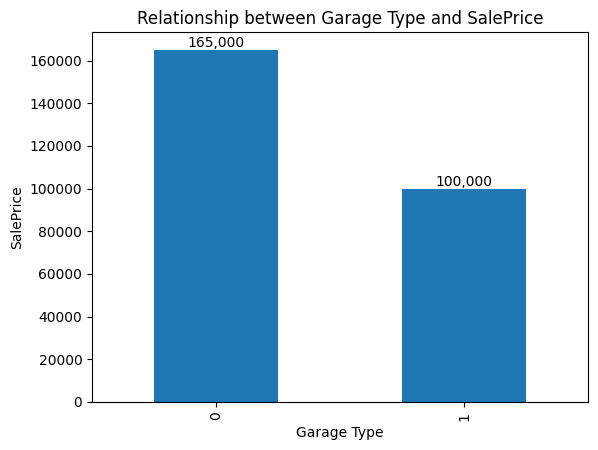

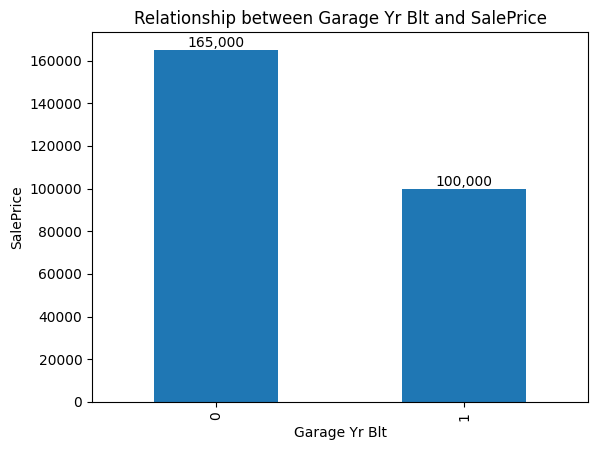

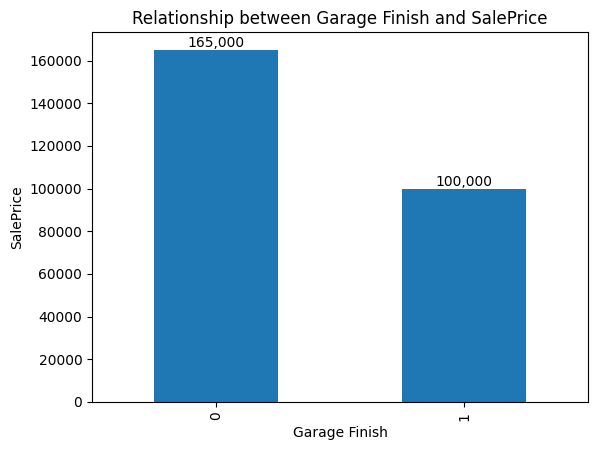

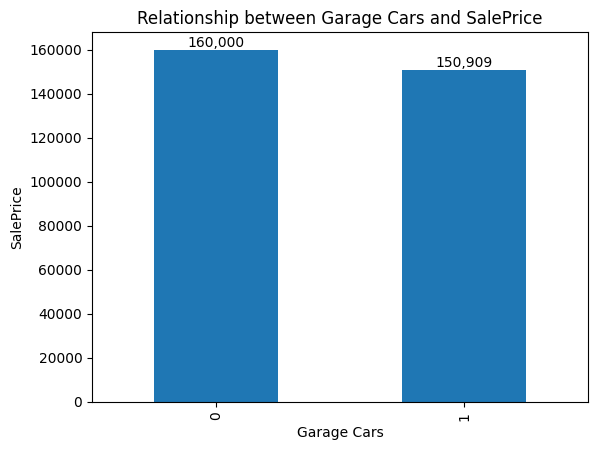

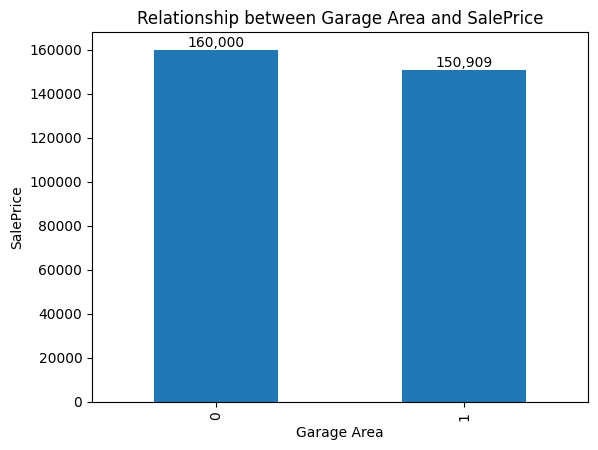

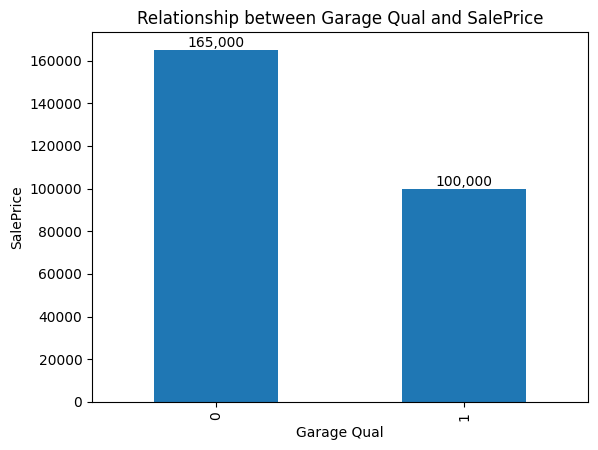

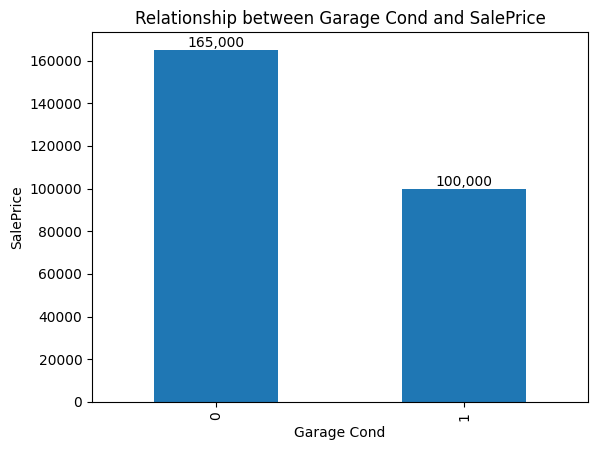

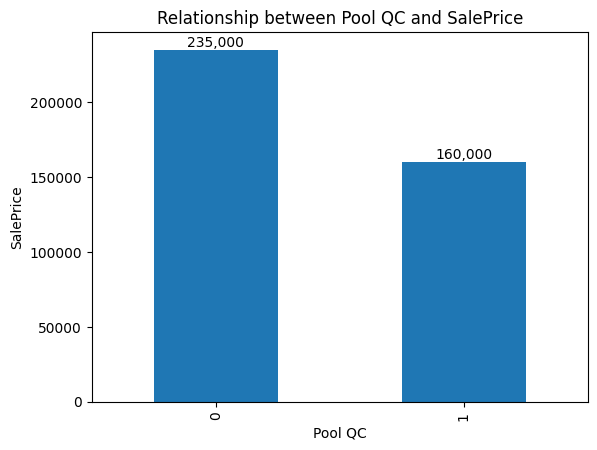

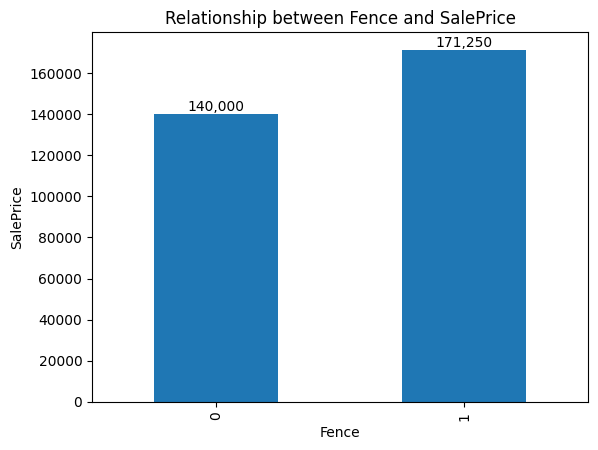

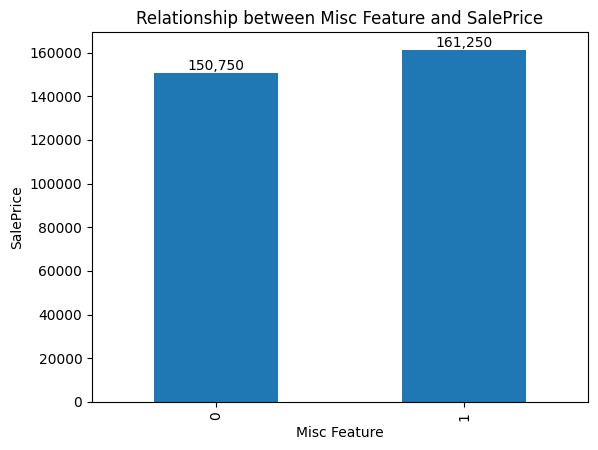

In [6]:

feature_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1]

for feature in feature_with_na:
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Grouping and computing median
    grouped = data.groupby(feature)['SalePrice'].median()

    # Plotting
    ax = grouped.plot.bar()
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.ylabel("SalePrice")
    plt.xlabel(feature)

    # Adding text labels above bars
    for idx, val in enumerate(grouped):
        ax.text(idx, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

    plt.show()


This technique, known as 'missingness as information', explores the relationship between missing values and SalePrice. In this dataset, the relationship is clearly evident, indicating that the missingness should be addressed appropriately during feature engineering

### Numerical Variables

In [5]:
num_col = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']


print(f'number of numerical variable is {len(num_col)}')
dataset[num_col]

number of numerical variable is 39


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


### Temporal Variable (datetime variables)
A temporal variable is any variable related to time, and it’s often transformed into more meaningful features (like age or elapsed time) during feature engineerin

In the Ames dataset, **YearBuilt**, **YearRemodAdd**, **GarageYrBlt**, and **YrSold** are temporal variables. These help us derive meaningful features like house age, renovation age, and seasonality, all of which can improve model performance.

In [6]:
temporal_feature = [feature for feature in num_col if 'Yr' in feature or 'Year' in feature ]

temporal_feature

dataset[temporal_feature]

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
0,1960,1960,1960.0,2010
1,1961,1961,1961.0,2010
2,1958,1958,1958.0,2010
3,1968,1968,1968.0,2010
4,1997,1998,1997.0,2010
...,...,...,...,...
2925,1984,1984,1984.0,2006
2926,1983,1983,1983.0,2006
2927,1992,1992,NaN,2006
2928,1974,1975,1975.0,2006


Text(0.5, 1.0, 'house price vs year sold')

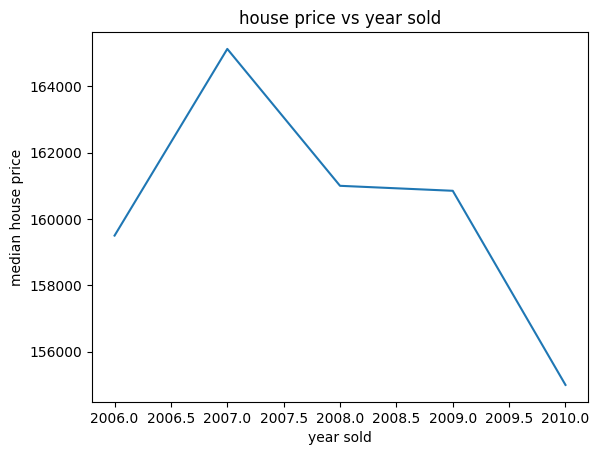

In [9]:
dataset.groupby('Yr Sold')['SalePrice'].median().plot()
plt.xlabel('year sold')
plt.ylabel('median house price')
plt.title('house price vs year sold')

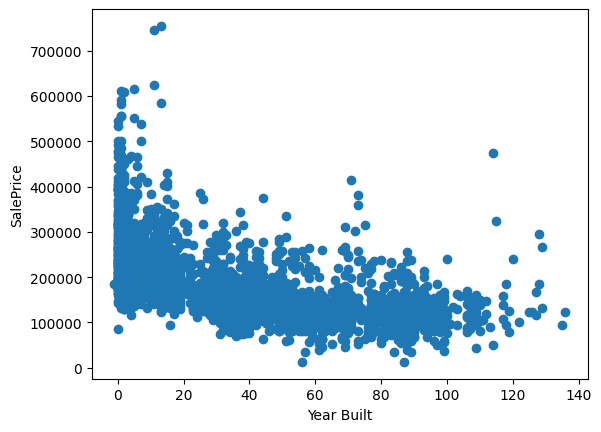

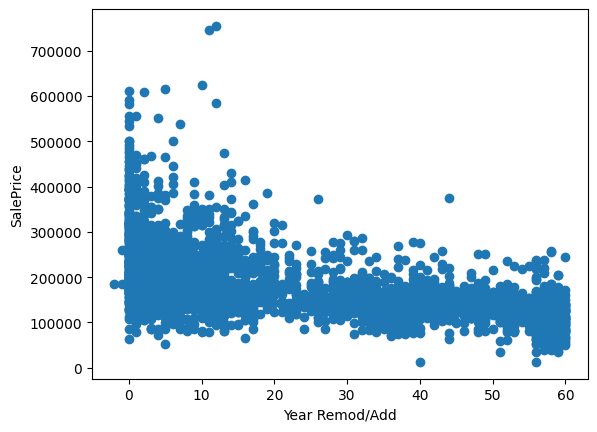

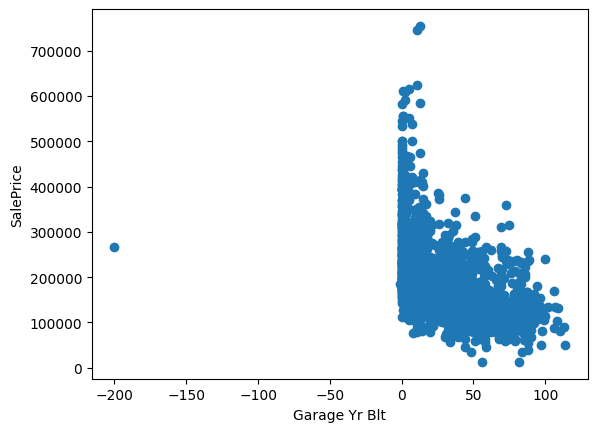

In [7]:
## comparing all temporal_feature with SalePrice

for feature in temporal_feature:
  if feature != 'Yr Sold':
    data = dataset.copy()

    data[feature] = data['Yr Sold'] - data[feature]

    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

The scatter plot shows a clear inverse relationship between house age and sale price. Newer houses tend to sell at higher prices, while older homes are generally priced lower. There are also some outliers worth exploring, and the data is concentrated mostly in homes aged between 0 and 80 years.

In [10]:
# there are 2 types of numerical variables which are discrete and continuous 
discrete_feature = [feature for feature in dataset.columns if len(dataset[feature].unique()) < 30 and feature not in temporal_feature + [['PID'],['Order']]]

print('we have {} discrete features in this dataset'.format(len(discrete_feature)))


we have 57 discrete features in this dataset


In [11]:
# relationship between discrete feature and saleprice

for feature in discrete_feature:
  unique_values = dataset[feature].nunique()

  print(f'{feature} has {unique_values} unique values')

MS SubClass has 16 unique values
MS Zoning has 7 unique values
Street has 2 unique values
Alley has 2 unique values
Lot Shape has 4 unique values
Land Contour has 4 unique values
Utilities has 3 unique values
Lot Config has 5 unique values
Land Slope has 3 unique values
Neighborhood has 28 unique values
Condition 1 has 9 unique values
Condition 2 has 8 unique values
Bldg Type has 5 unique values
House Style has 8 unique values
Overall Qual has 10 unique values
Overall Cond has 9 unique values
Roof Style has 6 unique values
Roof Matl has 8 unique values
Exterior 1st has 16 unique values
Exterior 2nd has 17 unique values
Mas Vnr Type has 4 unique values
Exter Qual has 4 unique values
Exter Cond has 5 unique values
Foundation has 6 unique values
Bsmt Qual has 5 unique values
Bsmt Cond has 5 unique values
Bsmt Exposure has 4 unique values
BsmtFin Type 1 has 6 unique values
BsmtFin Type 2 has 6 unique values
Heating has 6 unique values
Heating QC has 5 unique values
Central Air has 2 unique

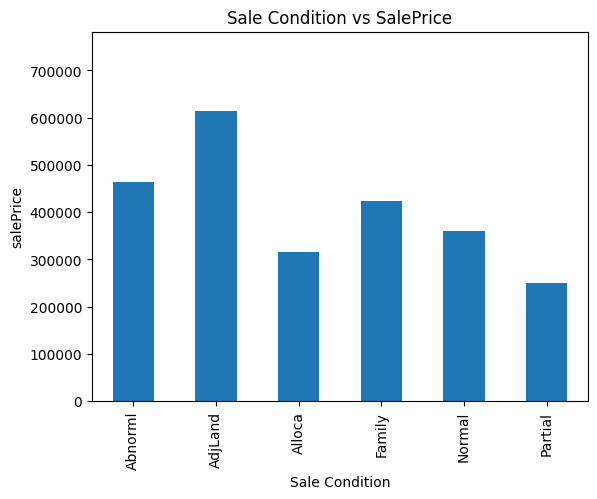

In [12]:
for feature in discrete_feature:
  data = dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("salePrice")
  plt.title(f'{feature} vs SalePrice')


In [13]:
continuous_feature = [feature for feature in dataset.columns if feature not in discrete_feature and feature not in temporal_feature + [['PID'],['Order']]  ]

In [14]:
for feature in continuous_feature:
  unique_values = dataset[feature].nunique()
  print('this {} has {} unique values'. format(feature, unique_values))



this Order has 2930 unique values
this PID has 2930 unique values
this Lot Frontage has 128 unique values
this Lot Area has 1960 unique values
this Mas Vnr Area has 445 unique values
this BsmtFin SF 1 has 995 unique values
this BsmtFin SF 2 has 274 unique values
this Bsmt Unf SF has 1137 unique values
this Total Bsmt SF has 1058 unique values
this 1st Flr SF has 1083 unique values
this 2nd Flr SF has 635 unique values
this Low Qual Fin SF has 36 unique values
this Gr Liv Area has 1292 unique values
this Garage Area has 603 unique values
this Wood Deck SF has 380 unique values
this Open Porch SF has 252 unique values
this Enclosed Porch has 183 unique values
this 3Ssn Porch has 31 unique values
this Screen Porch has 121 unique values
this Misc Val has 38 unique values
this SalePrice has 1032 unique values


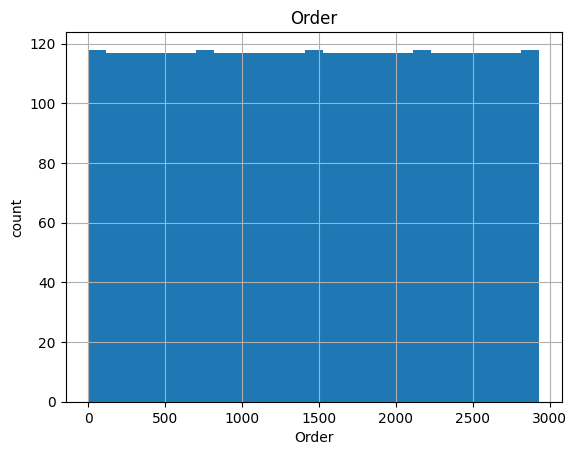

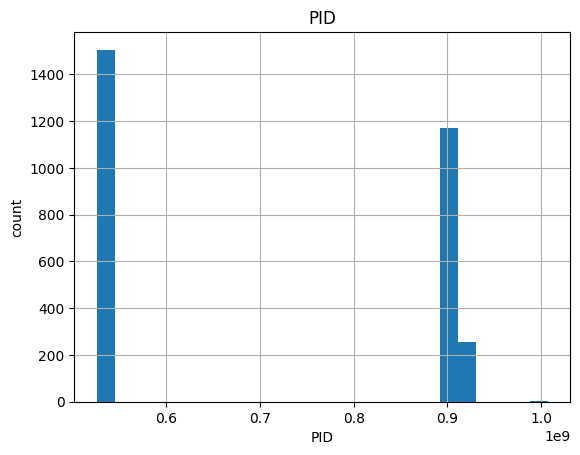

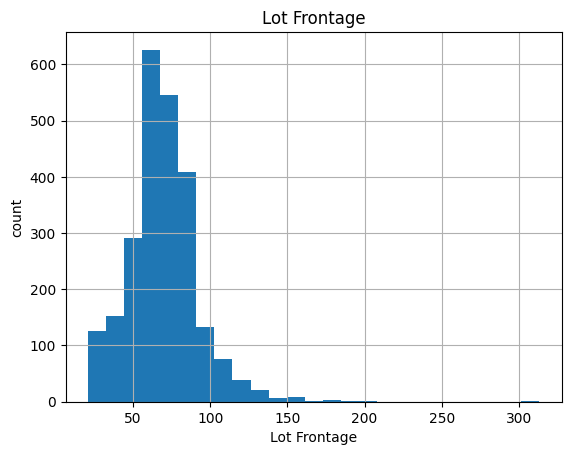

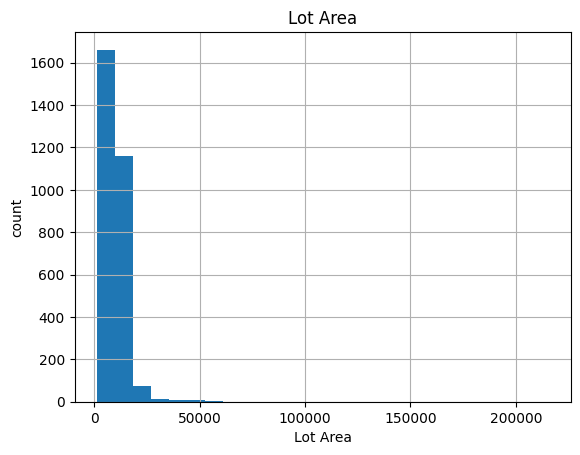

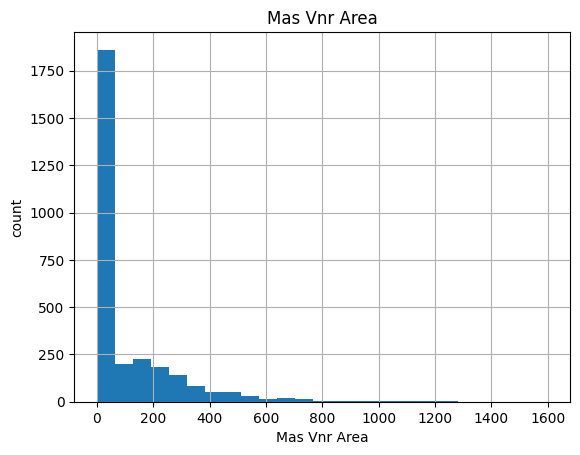

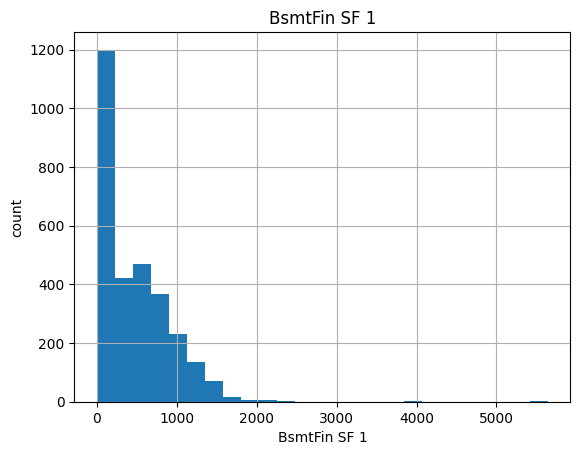

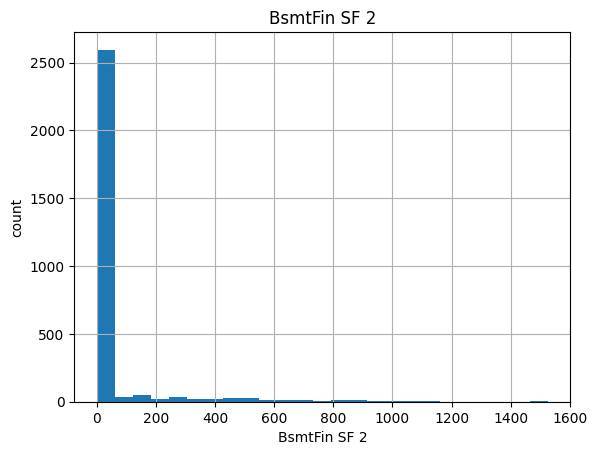

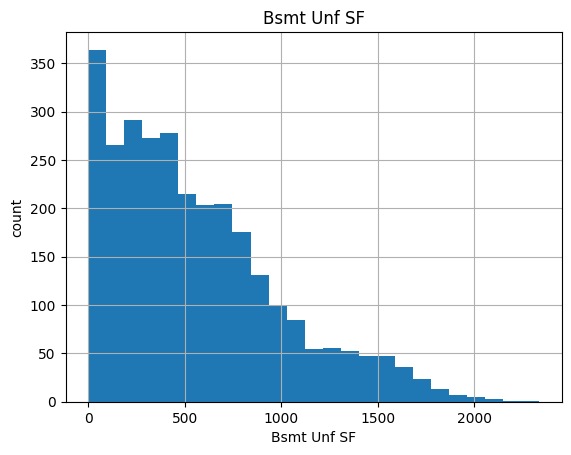

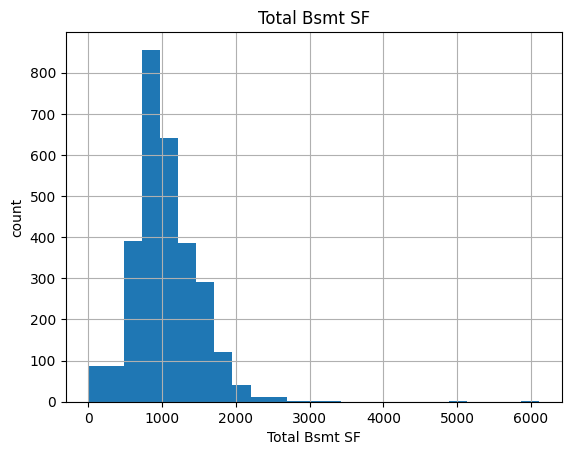

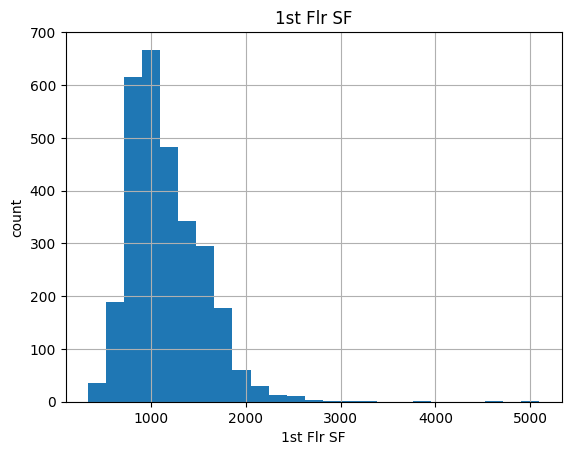

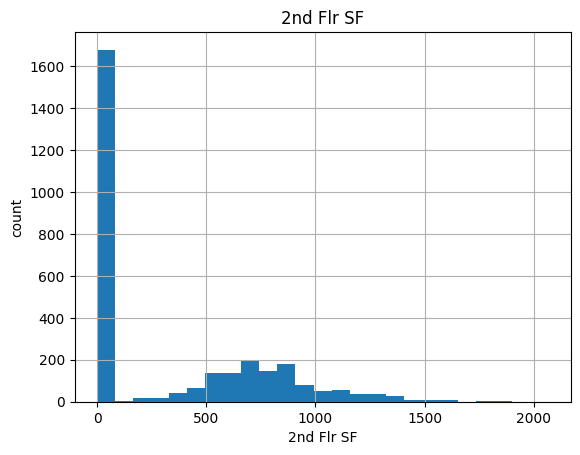

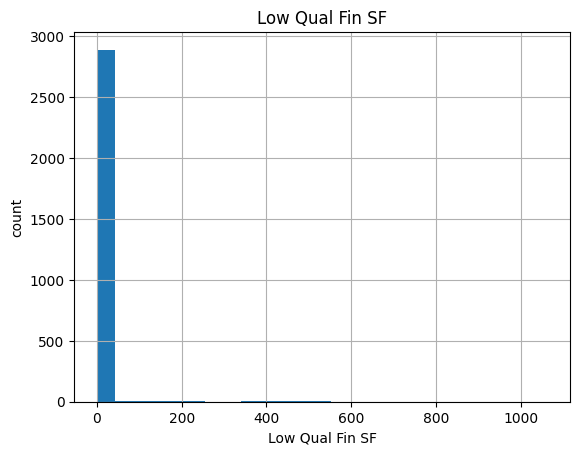

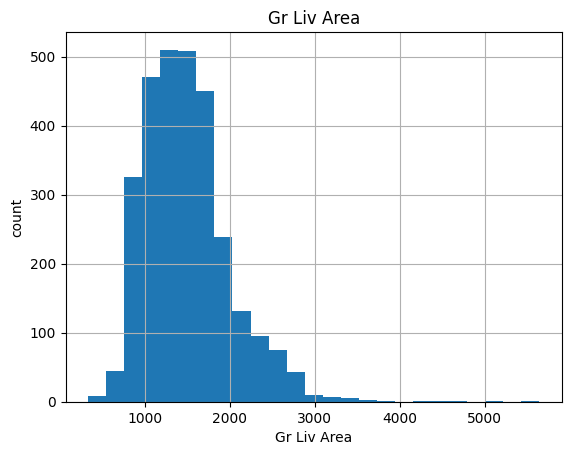

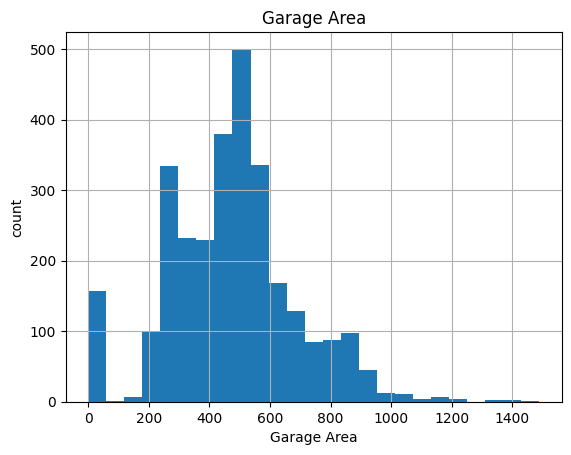

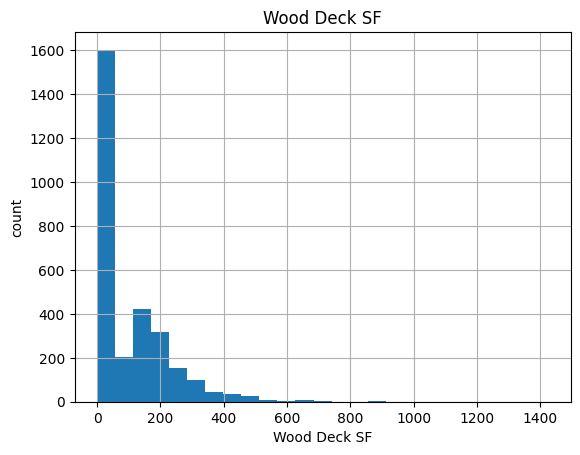

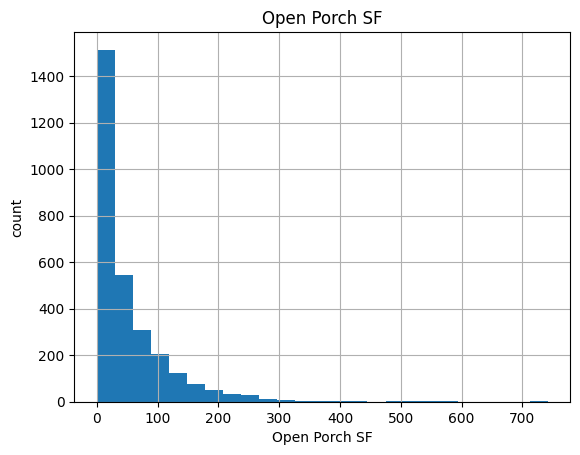

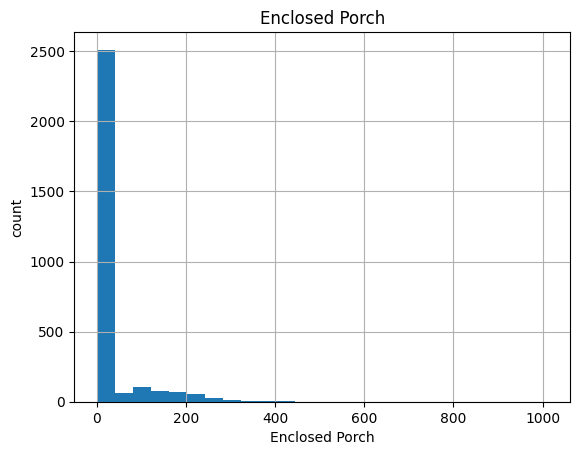

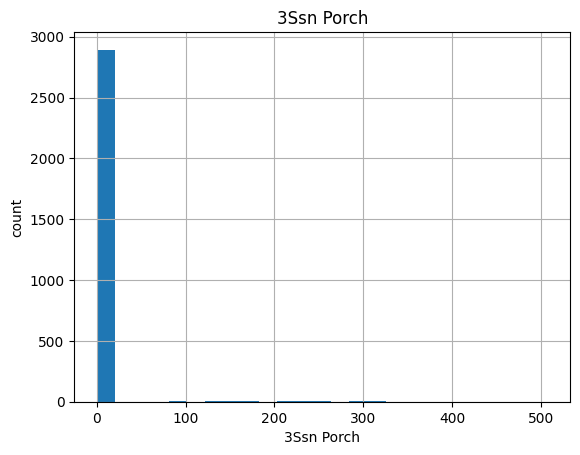

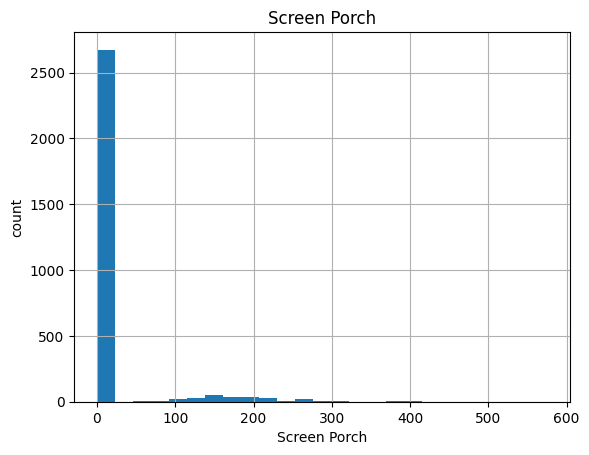

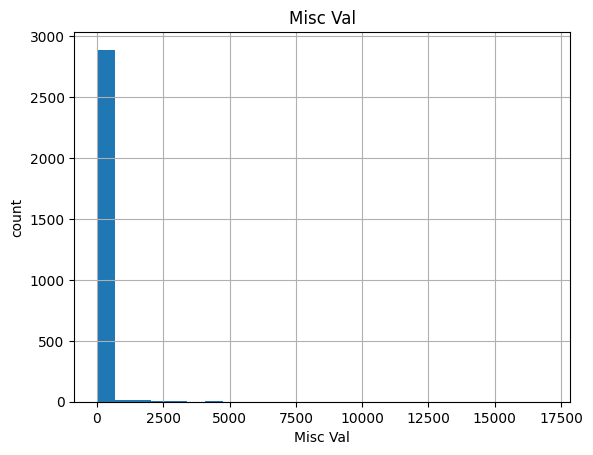

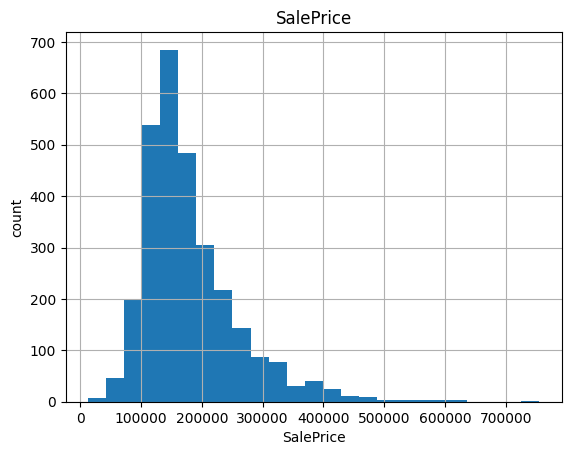

In [16]:
for feature in continuous_feature:
  data = dataset.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()

In [17]:

type(dataset)

pandas.core.frame.DataFrame

In [18]:
dataset[continuous_feature].dtypes

Order                int64
PID                  int64
Lot Frontage       float64
Lot Area             int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Misc Val             int64
SalePrice            int64
dtype: object

In [19]:
(dataset[continuous_feature] < 0).any()


Order              False
PID                False
Lot Frontage       False
Lot Area           False
Mas Vnr Area       False
BsmtFin SF 1       False
BsmtFin SF 2       False
Bsmt Unf SF        False
Total Bsmt SF      False
1st Flr SF         False
2nd Flr SF         False
Low Qual Fin SF    False
Gr Liv Area        False
Garage Area        False
Wood Deck SF       False
Open Porch SF      False
Enclosed Porch     False
3Ssn Porch         False
Screen Porch       False
Misc Val           False
SalePrice          False
dtype: bool

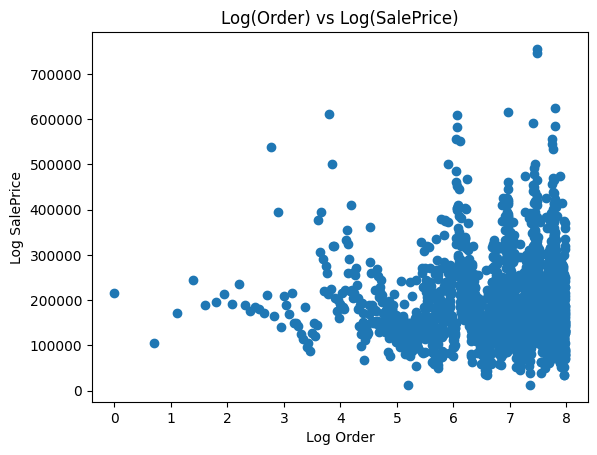

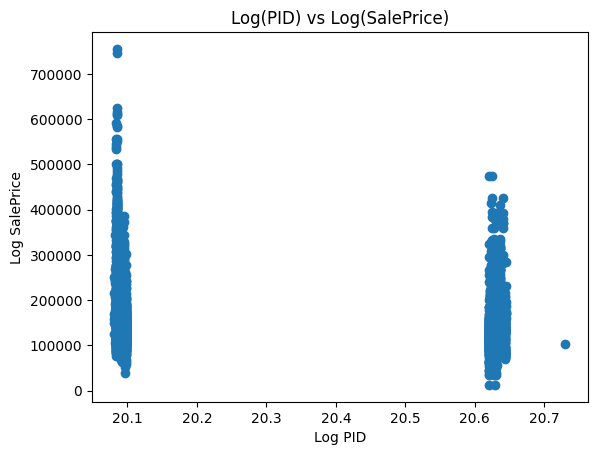

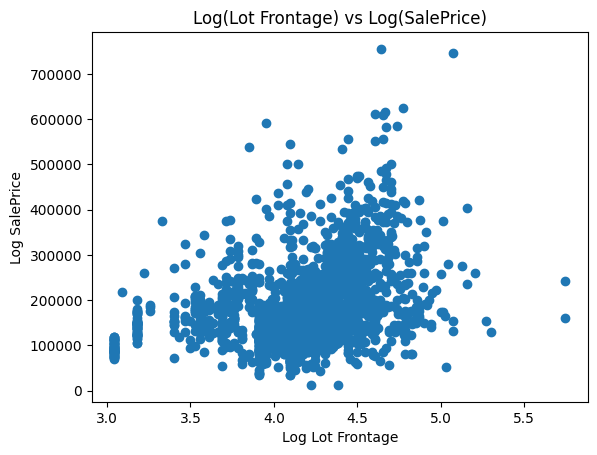

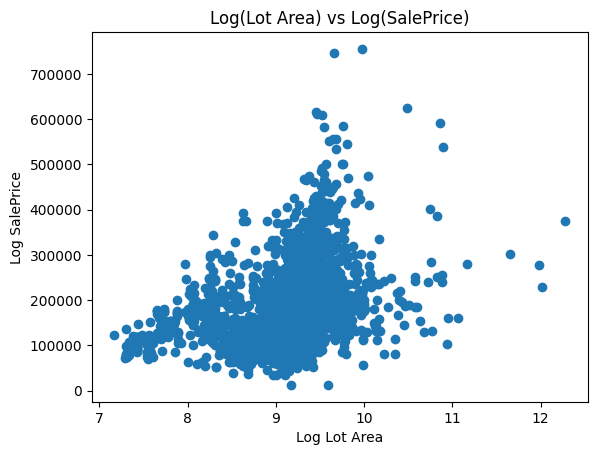

c:\Users\USER\Downloads\machine learning\project\ames-housing-project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


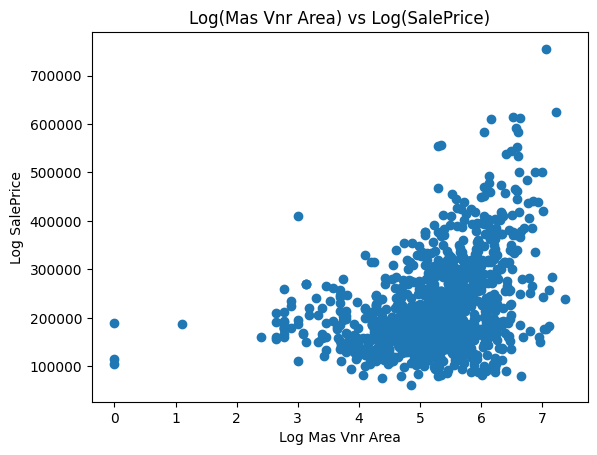

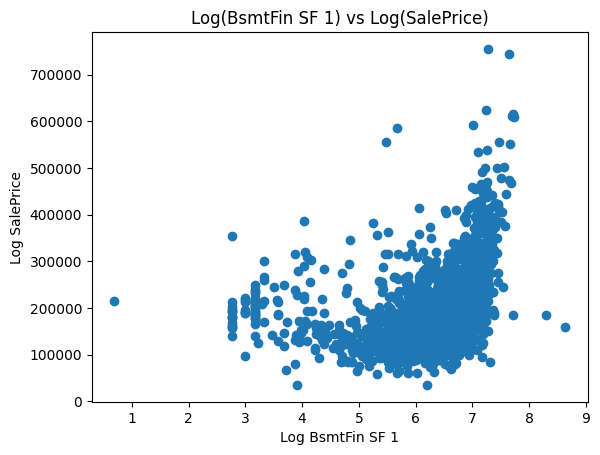

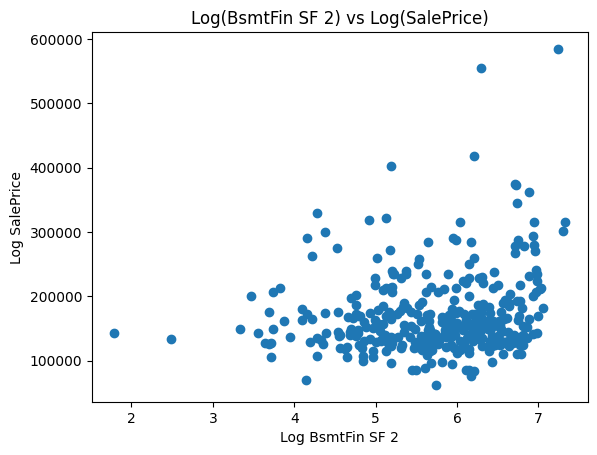

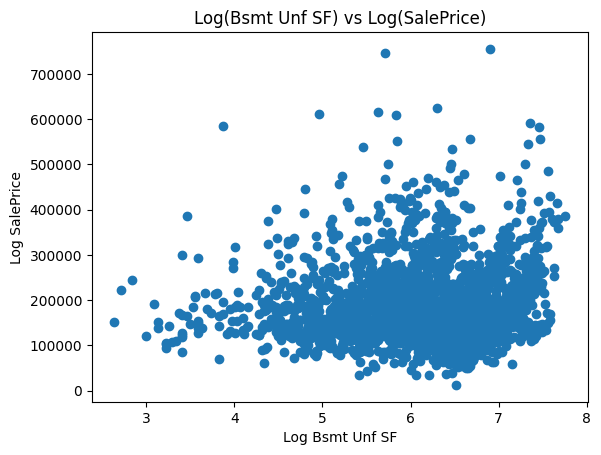

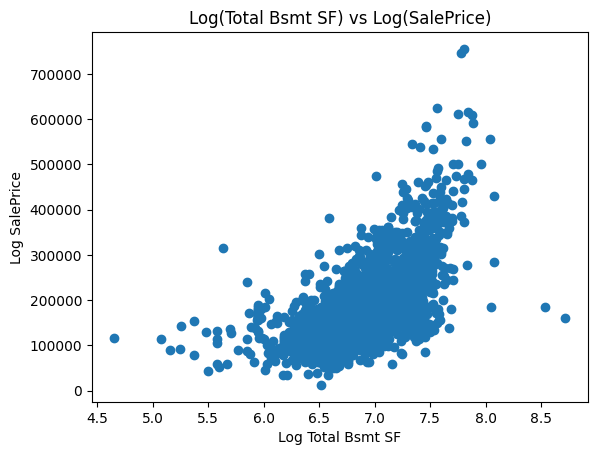

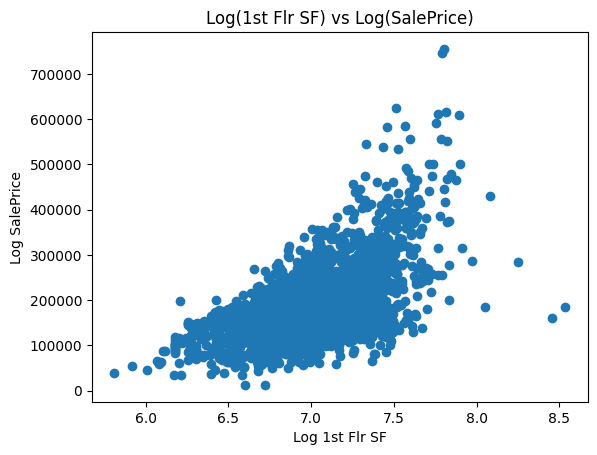

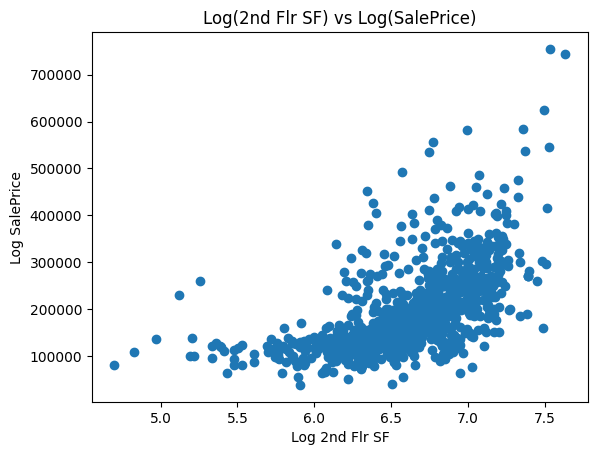

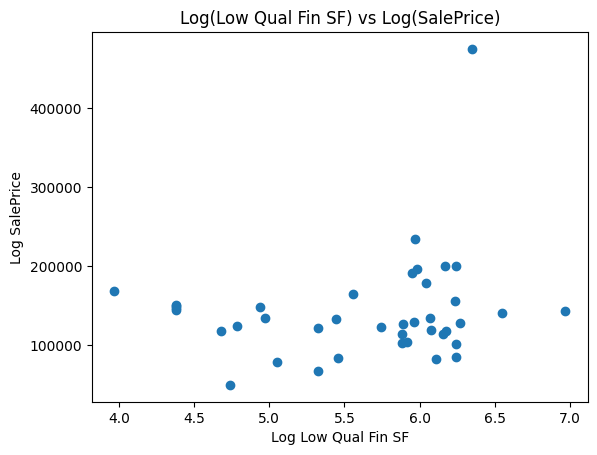

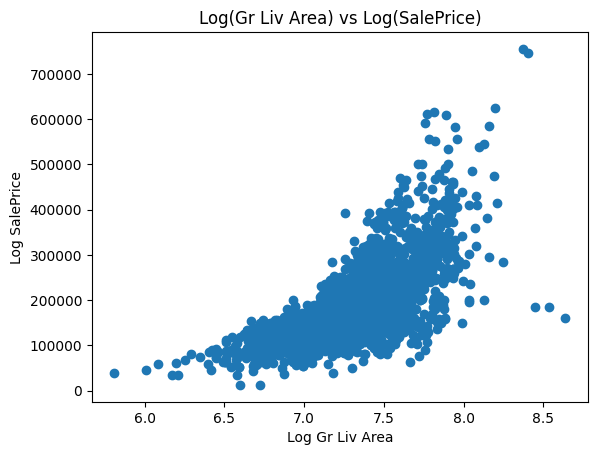

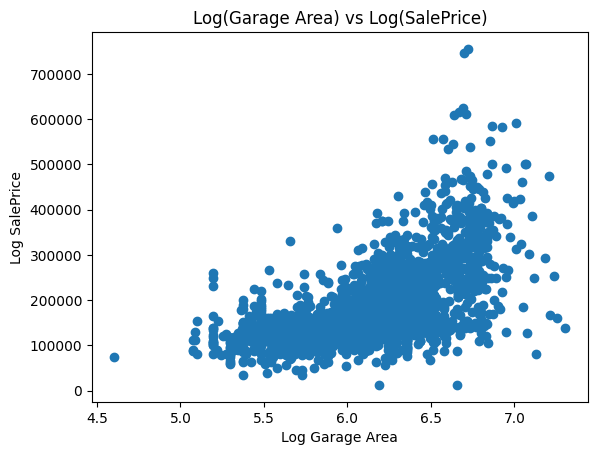

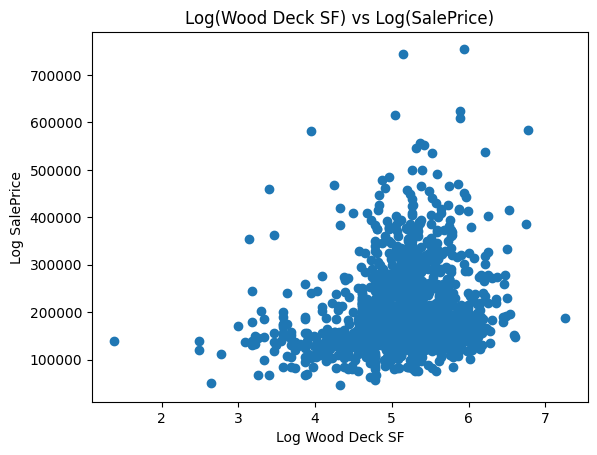

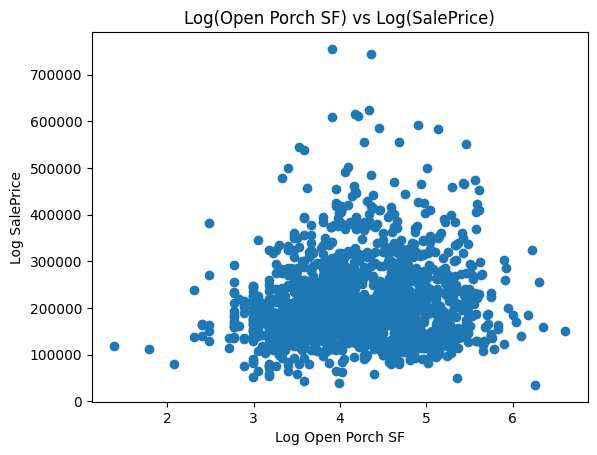

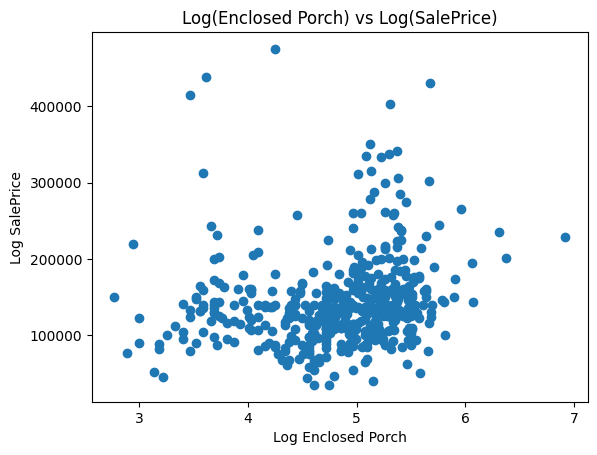

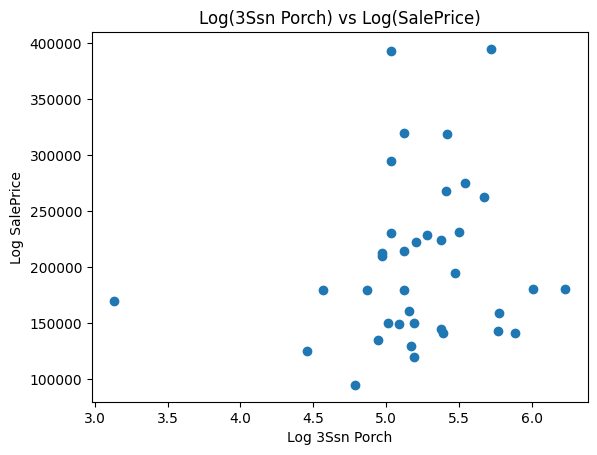

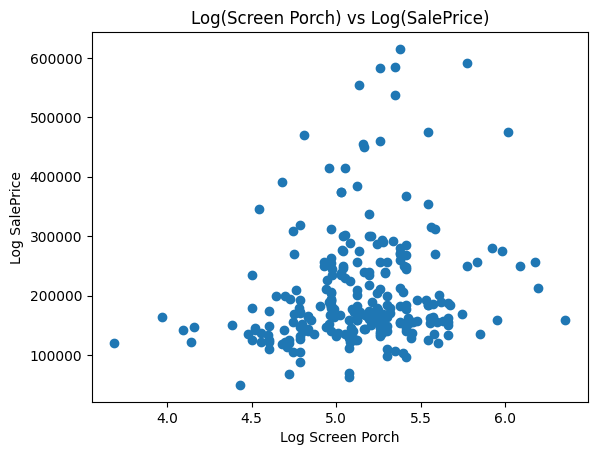

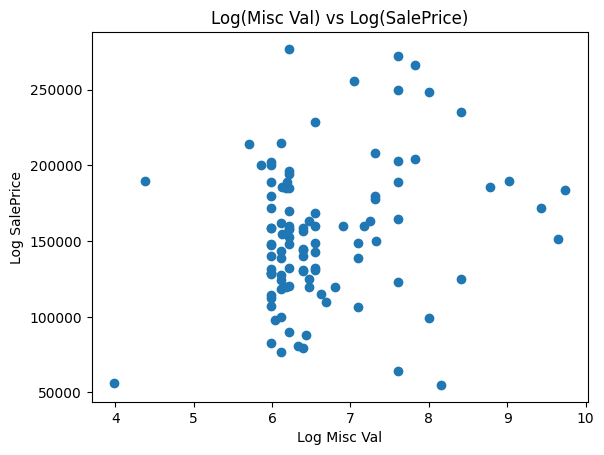

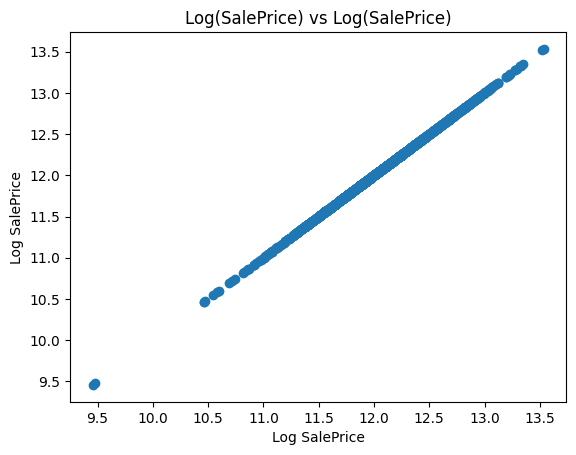

In [20]:
# logarithmic transformation for the skewed data (data that is not normally distributed)

# Make a single copy of your dataset


# Apply log transform to SalePrice once

# Loop through continuous numeric features
for feature in continuous_feature:
    data = dataset.copy()
    data[feature] = np.log(data[feature])
    
    # Plot log(feature) vs log(SalePrice)
    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(f'Log {feature}')
    plt.ylabel('Log SalePrice')
    plt.title(f'Log({feature}) vs Log(SalePrice)')
    plt.show()




### checking outliers


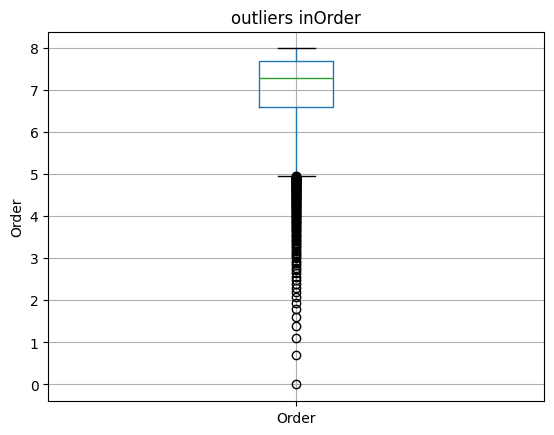

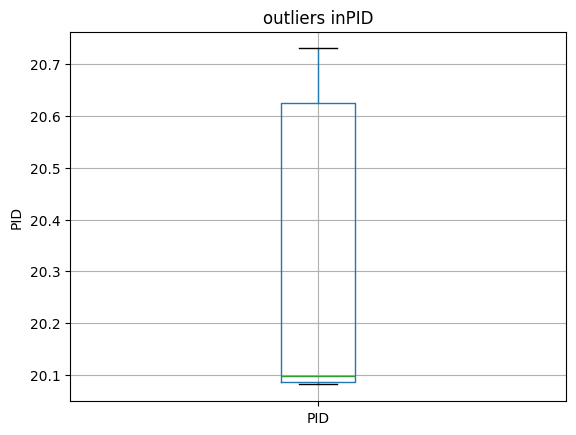

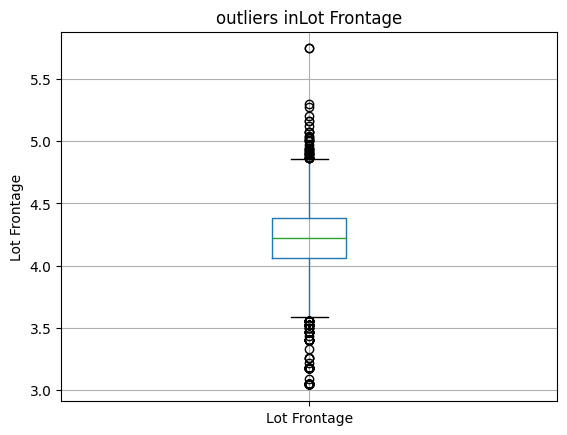

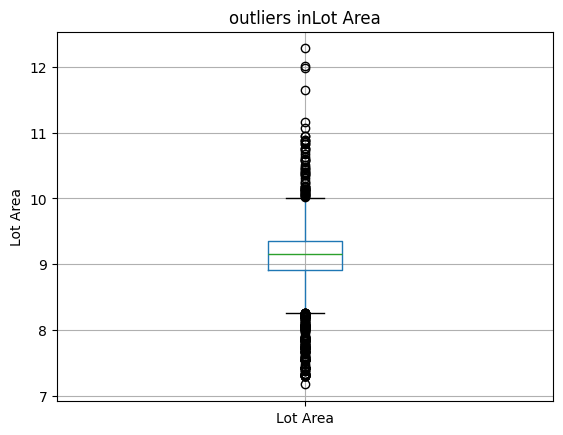

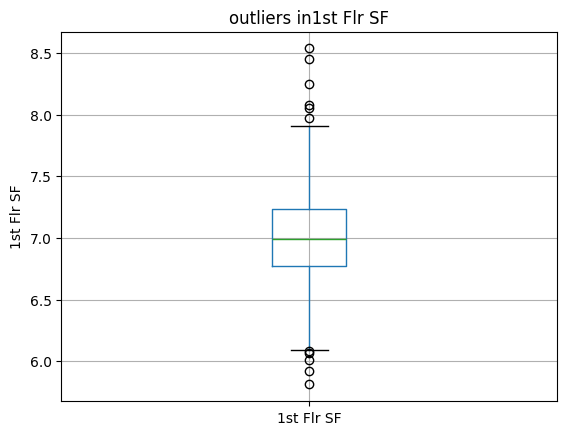

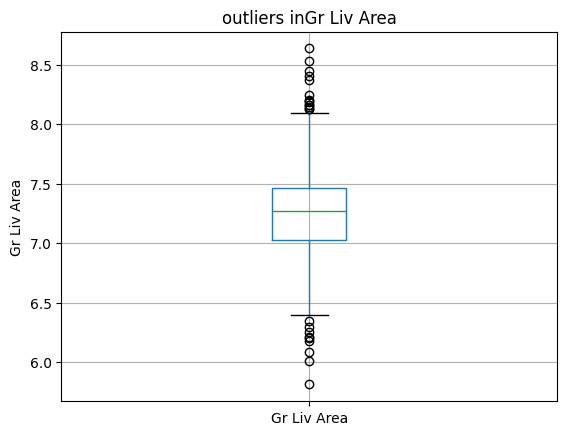

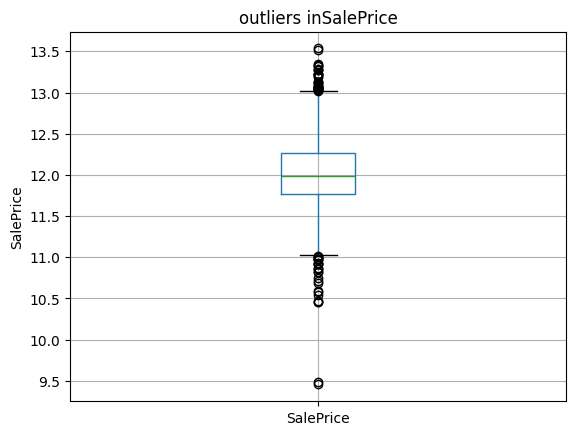

In [22]:
for feature in continuous_feature:
  data = dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column= feature)
    plt.ylabel(feature)
    plt.title(f'outliers in{feature}')
    plt.show()
    

In [19]:
# outliers function detection 
def outlier_summary(df, cols):
    data = df.copy()
    data[cols] = np.log(data[cols])
    summary = []
    for col in cols:
        data[col] = np.log(data[col])
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        summary.append((col, outliers.shape[0]))
    return pd.DataFrame(summary, columns=['Feature', 'Outlier Count']).sort_values(by='Outlier Count', ascending=False)

outlier_summary(dataset, continuous_feature)

c:\Users\USER\Downloads\machine learning\project\ames-housing-project\venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\USER\Downloads\machine learning\project\ames-housing-project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\USER\Downloads\machine learning\project\ames-housing-project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\USER\Downloads\machine learning\project\ames-housing-project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\USER\Downloads\machine learning\project\ames-housing-project\venv\Lib\site-packages\pandas\core

,Feature,Outlier Count
3,Lot Area,276
2,Lot Frontage,204
0,Order,188
5,BsmtFin SF 1,130
7,Bsmt Unf SF,73
14,Wood Deck SF,73
8,Total Bsmt SF,63
20,SalePrice,56
4,Mas Vnr Area,50
10,2nd Flr SF,42


In [45]:
### categorical variabeles

categorical_feature = [feature for feature in dataset.columns if data[feature].dtype == 'O']


for col in categorical_feature:
  data = dataset.copy()
  unique_values = data[col].nunique()
  if unique_values > 5:
    print(f'{col} has {unique_values} categories')



MS Zoning has 7 categories
Neighborhood has 28 categories
Condition 1 has 9 categories
Condition 2 has 8 categories
House Style has 8 categories
Roof Style has 6 categories
Roof Matl has 8 categories
Exterior 1st has 16 categories
Exterior 2nd has 17 categories
Foundation has 6 categories
BsmtFin Type 1 has 6 categories
BsmtFin Type 2 has 6 categories
Heating has 6 categories
Functional has 8 categories
Garage Type has 6 categories
Sale Type has 10 categories
Sale Condition has 6 categories


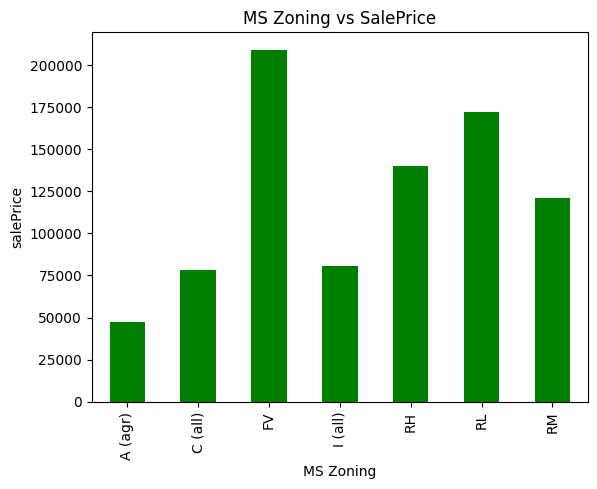

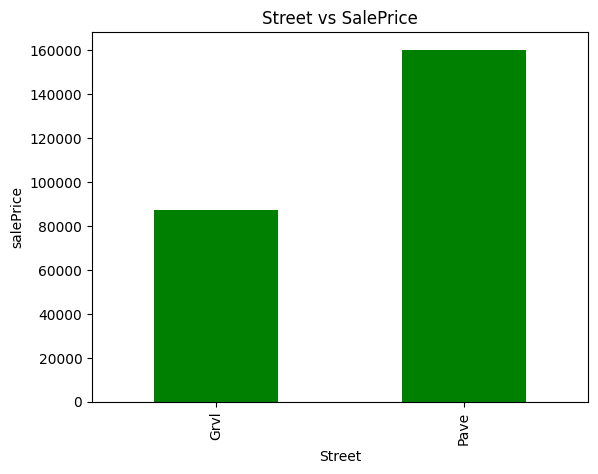

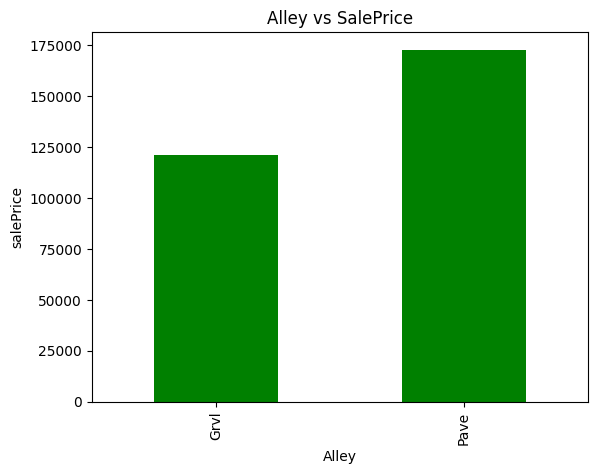

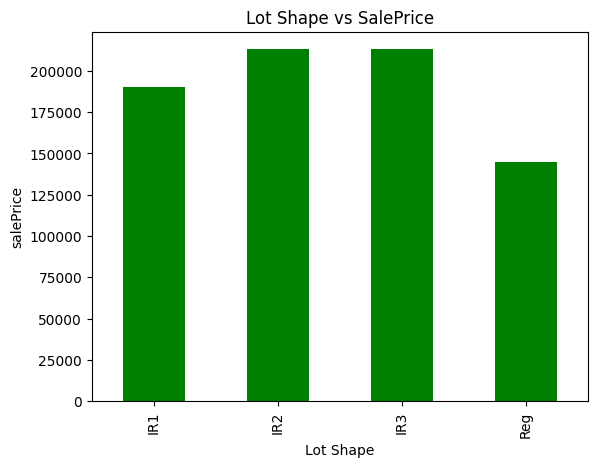

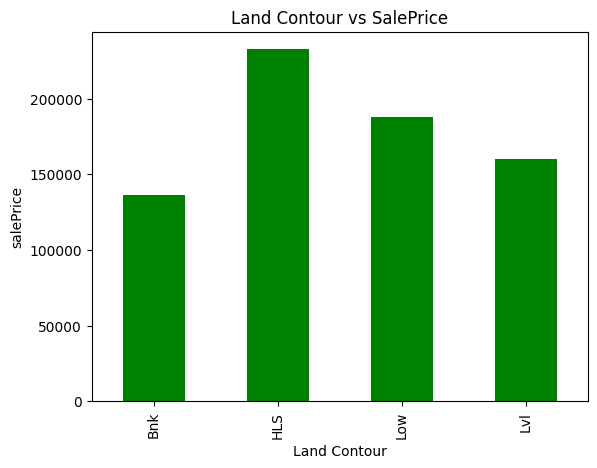

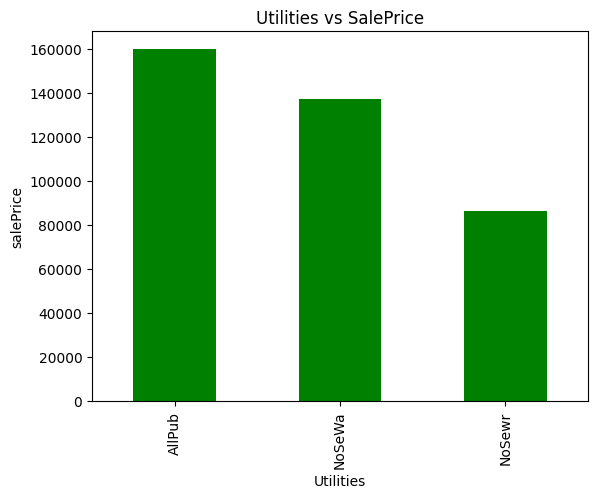

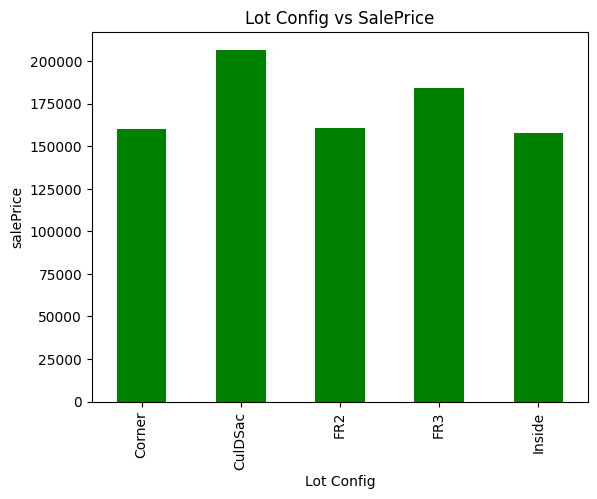

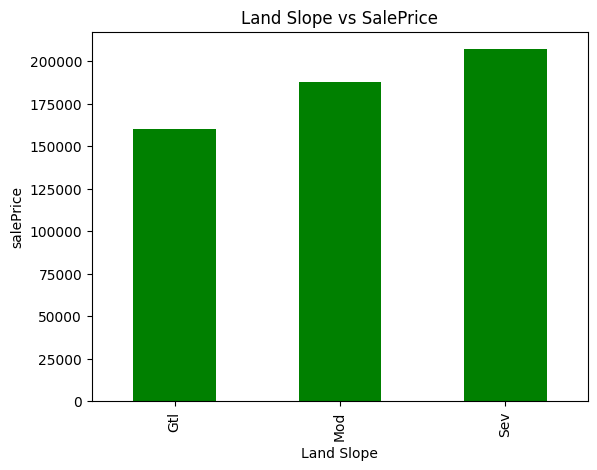

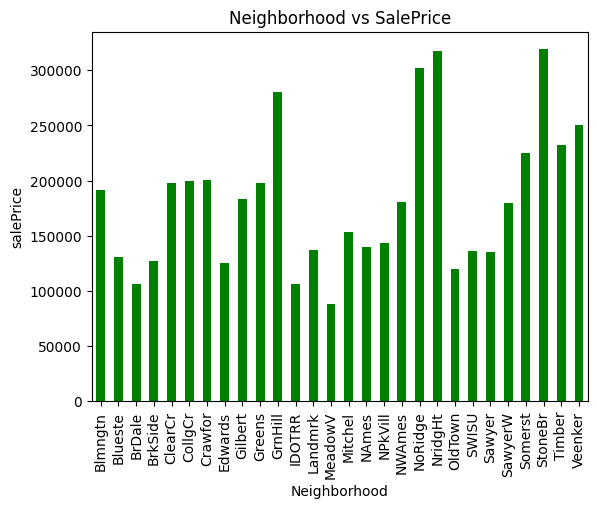

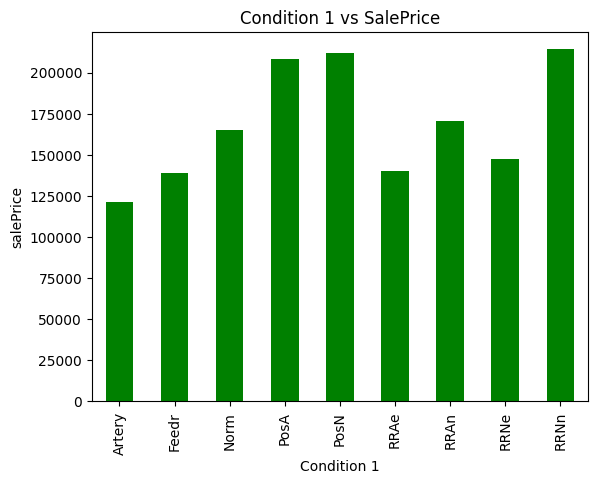

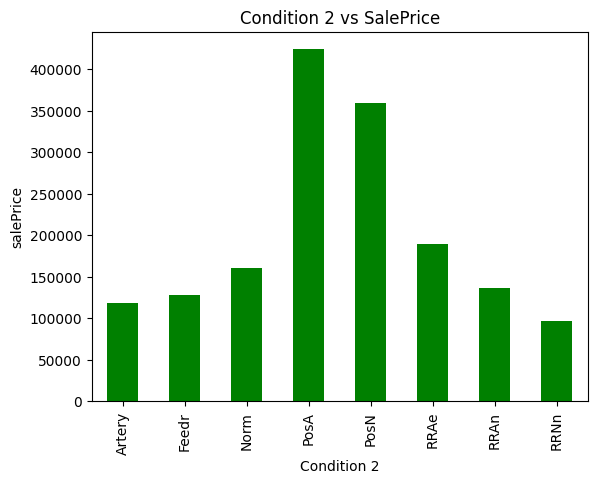

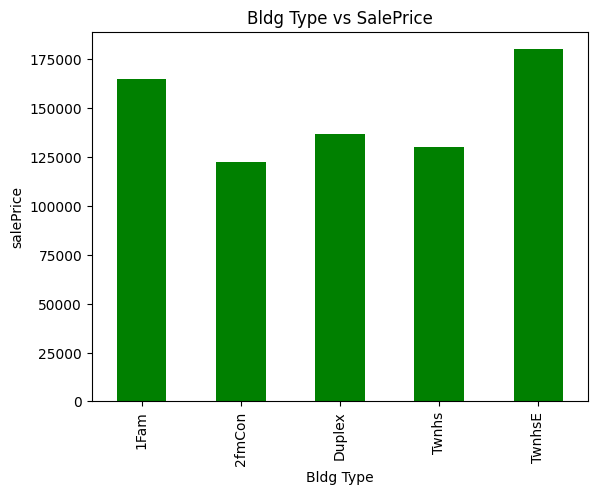

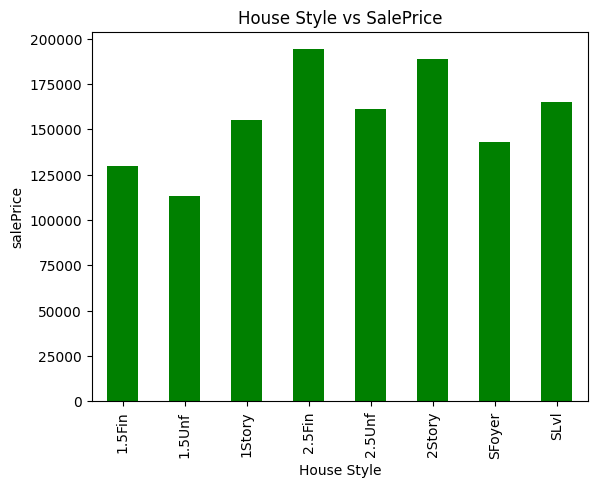

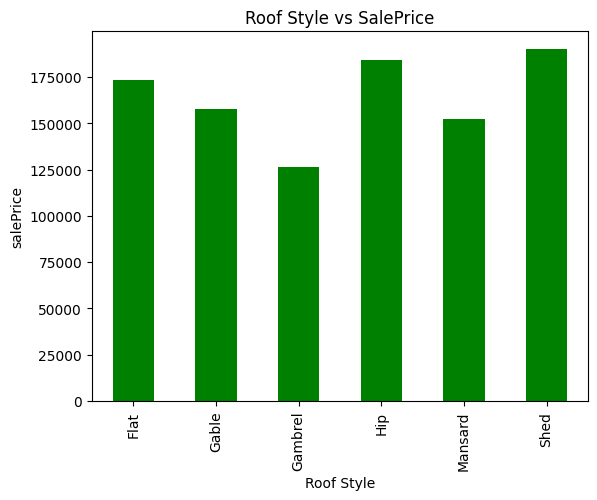

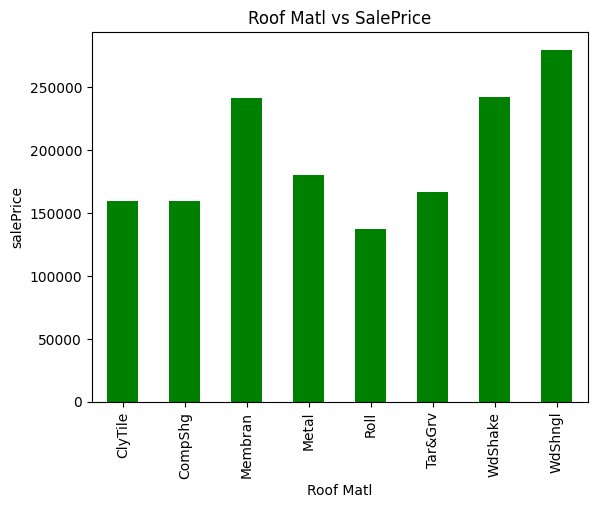

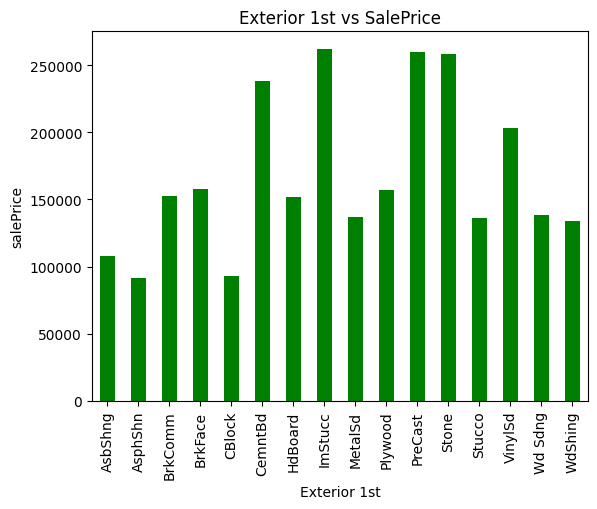

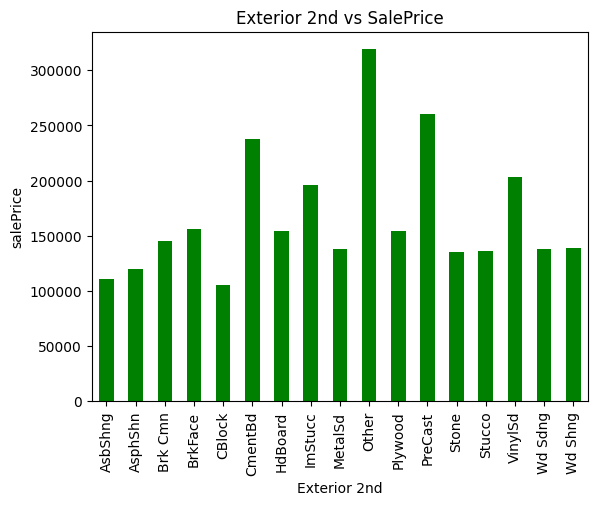

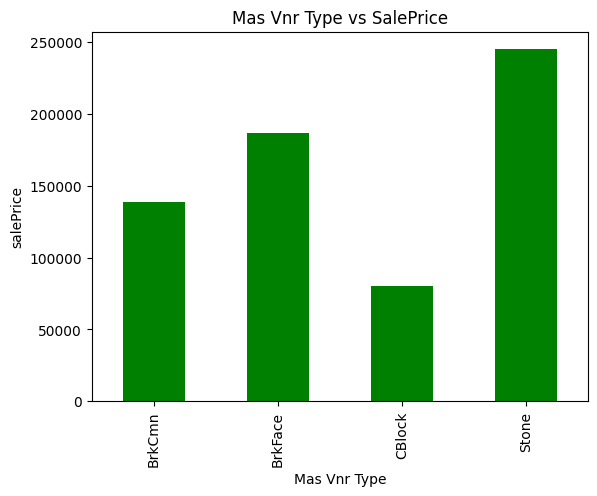

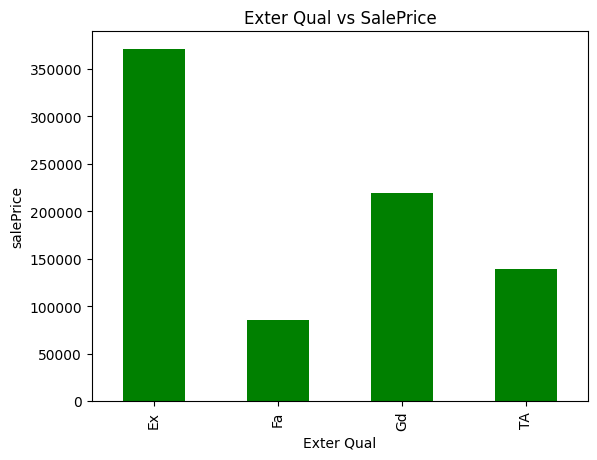

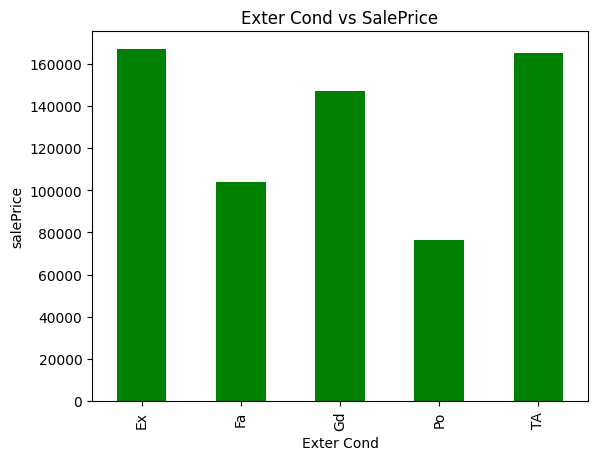

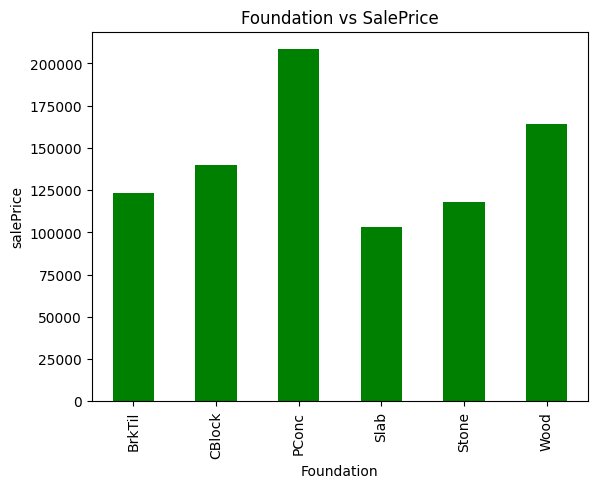

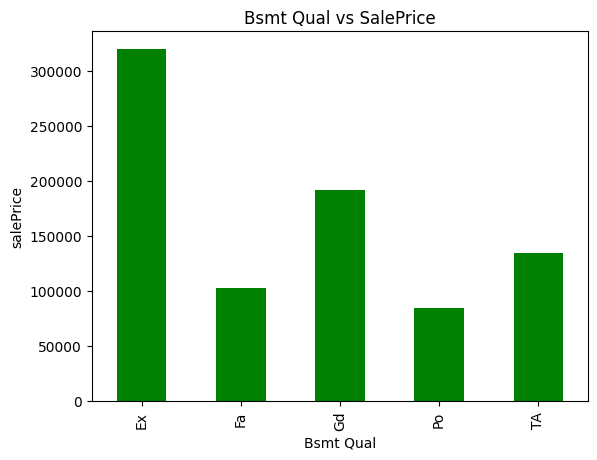

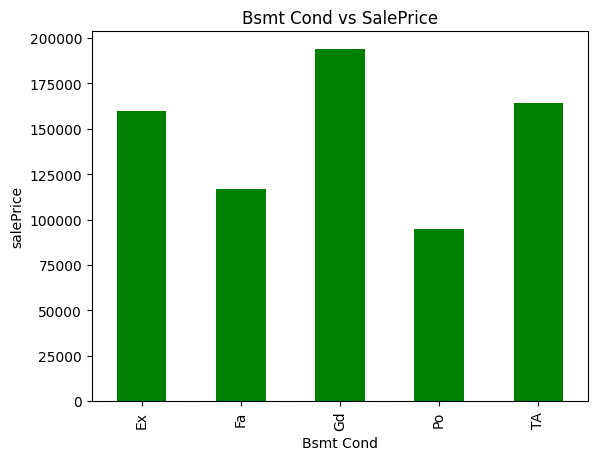

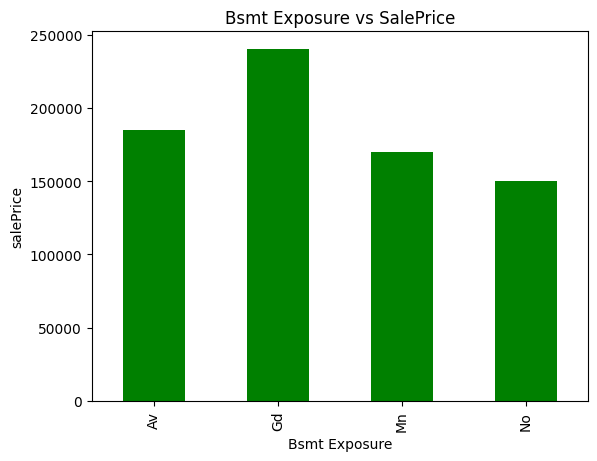

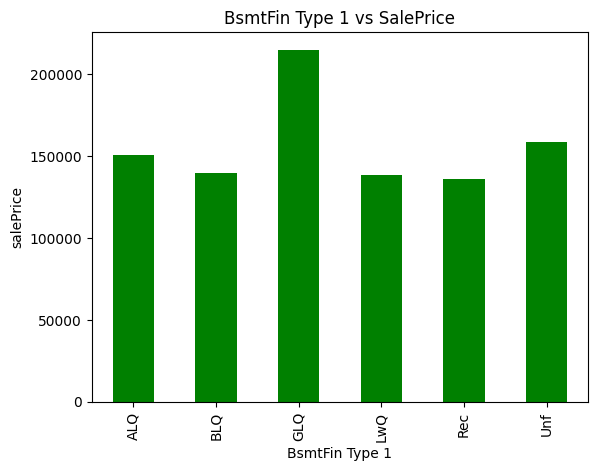

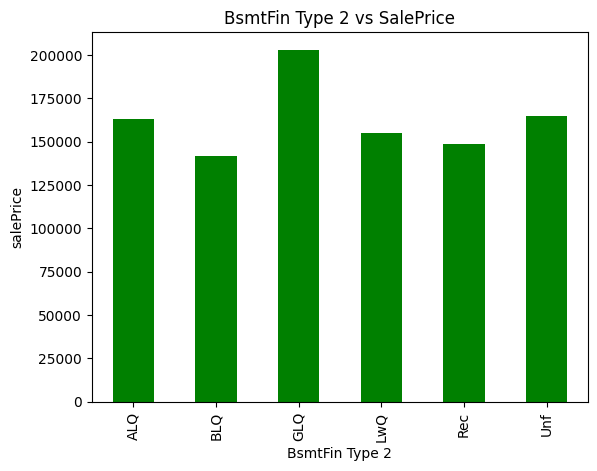

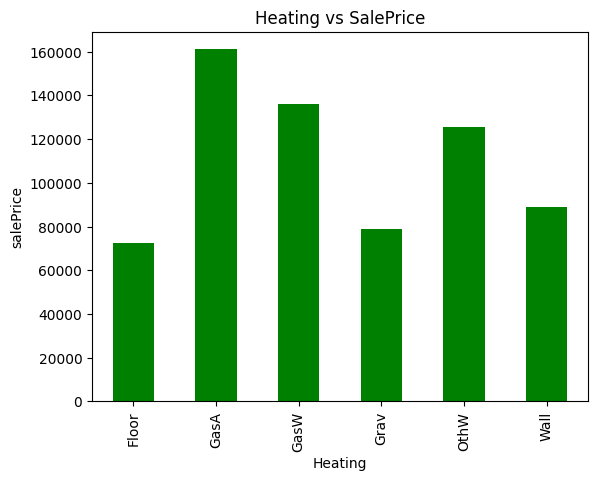

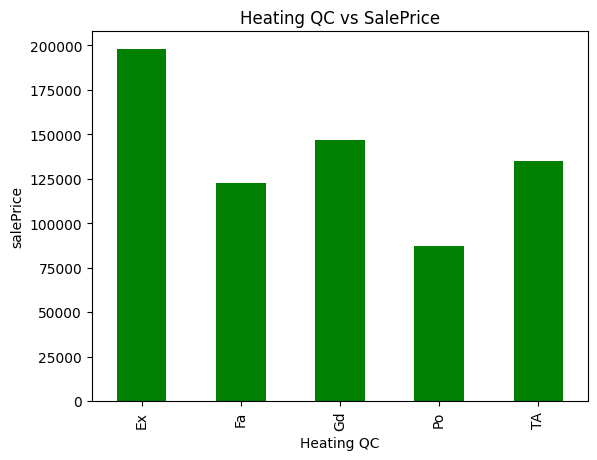

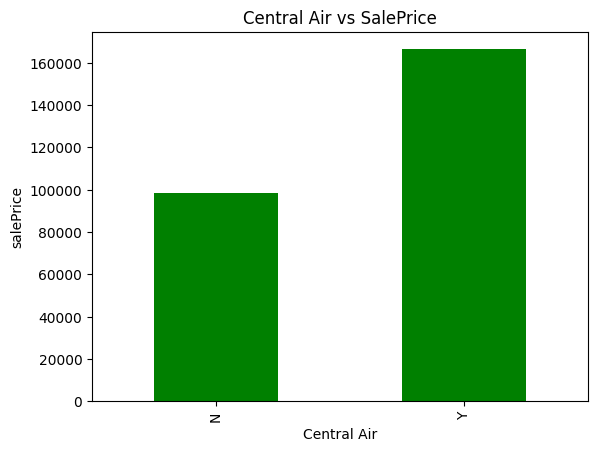

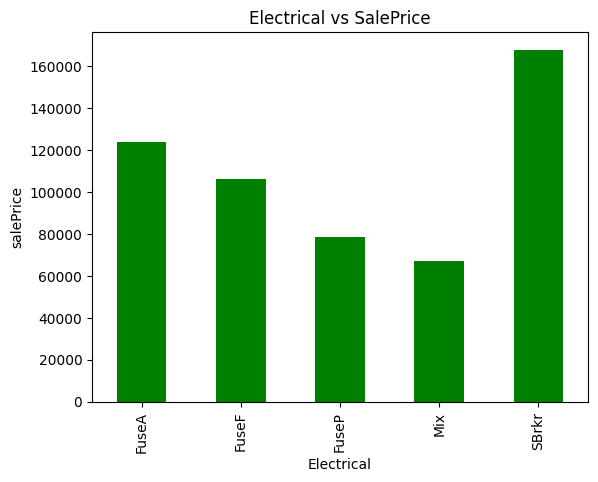

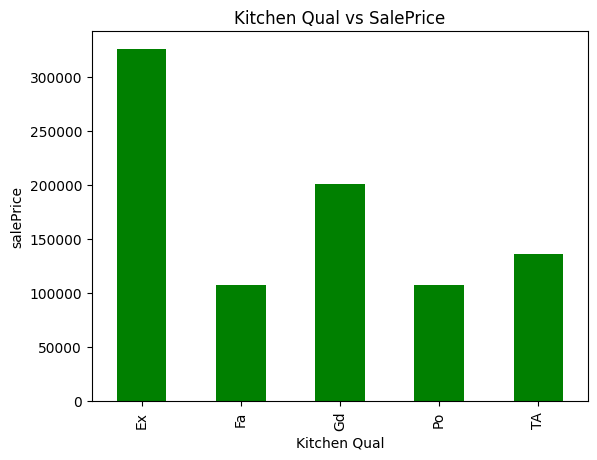

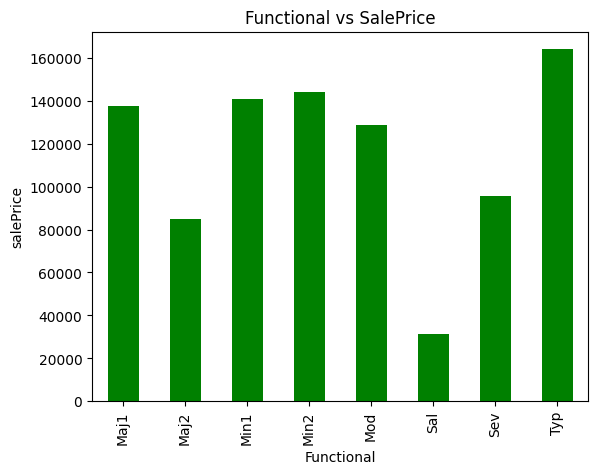

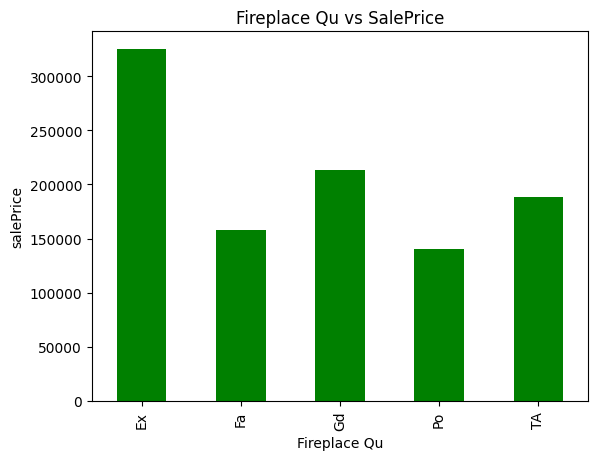

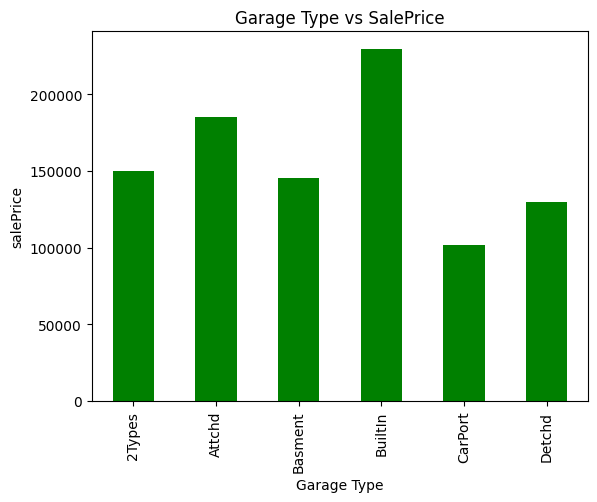

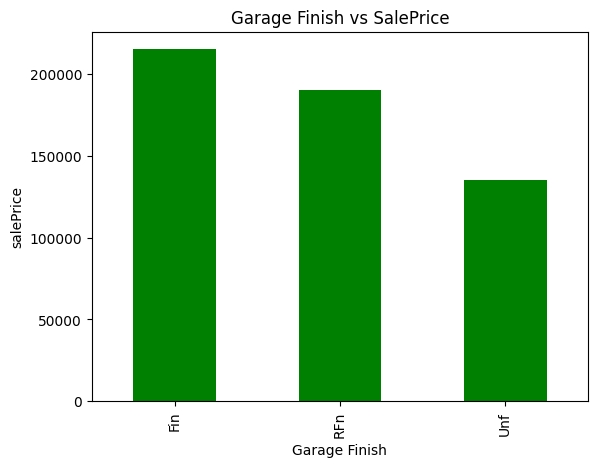

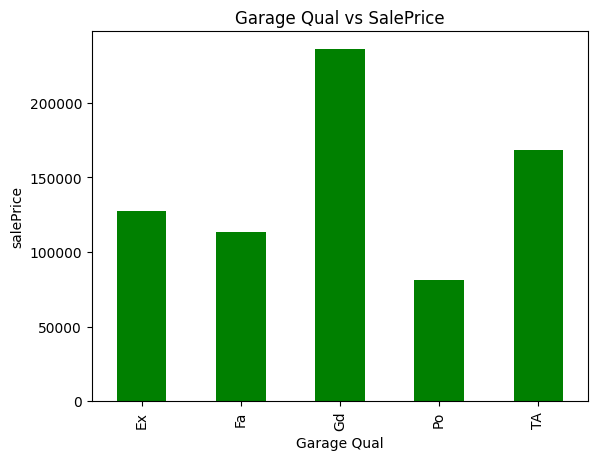

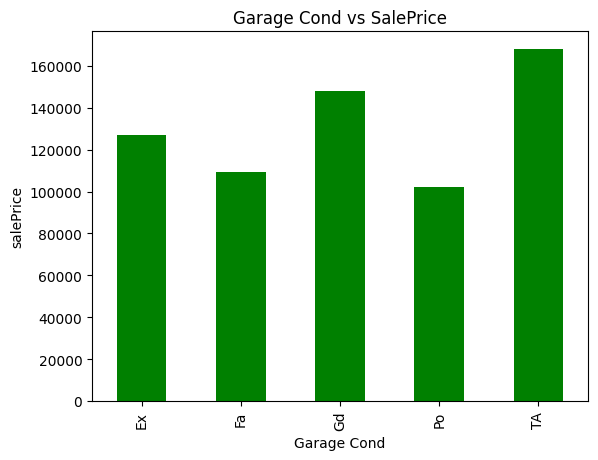

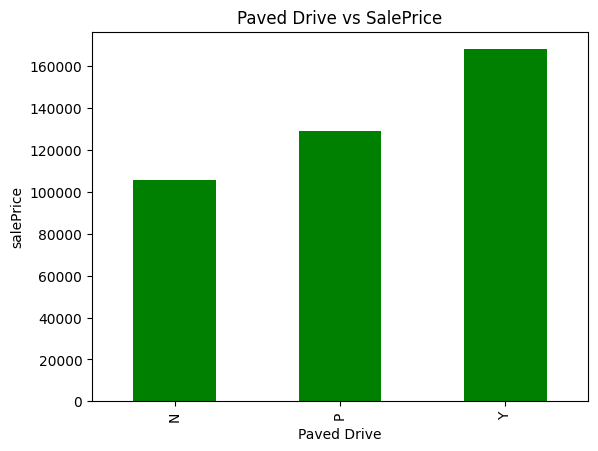

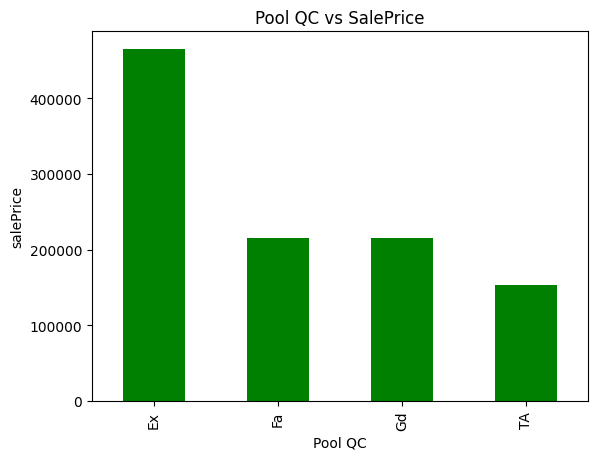

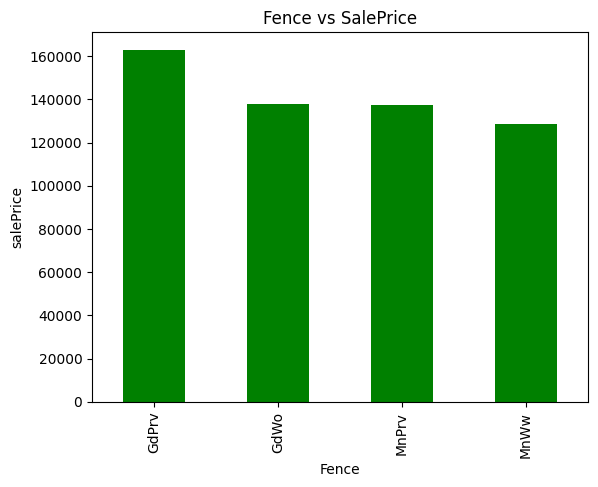

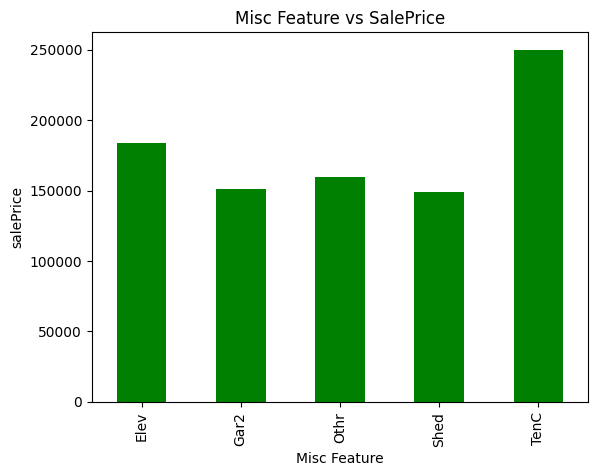

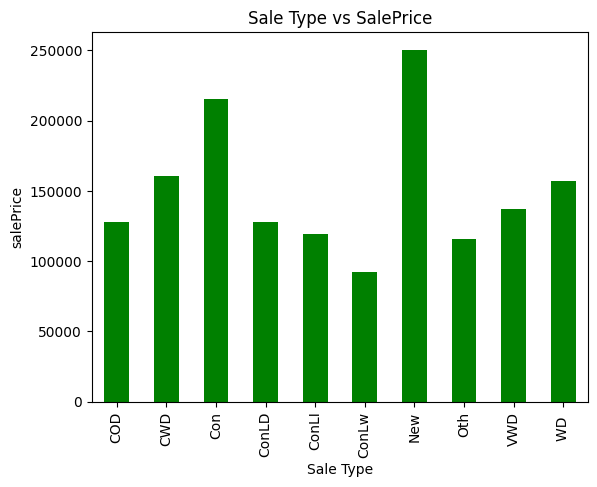

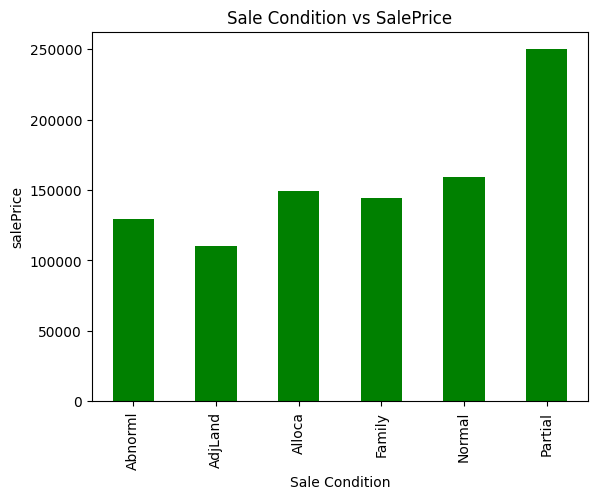

In [50]:
for feature in categorical_feature:
  data = dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar(color= 'green')
  plt.xlabel(feature)
  plt.ylabel("salePrice")
  plt.title(f'{feature} vs SalePrice')
  plt.show()